# Primus Standard Auditors KPI

In [1]:
import numpy as np
import pandas as pd
#import statsmodels.api as sm
import matplotlib.pyplot as plt
#from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Parameters

In [2]:
CBName = 'Primus Auditing Ops (PAO)'  ##Muestra solo la informacion del cliente en pantalla, no afecta los resultados finales (exportacion a excel)

Year = 2021

HighProportionNC_restriction = 1
LowProportionNC_restriction = 0.5
HighVariationNC_restriction = 1
LowVariationNC_restriction = 0.5
HighChangeinAYearNC_restriction = 1
LowChangeinAYearNC_restriction = 0.5

## Load the Data

In [3]:
dataframe = pd.read_excel("C:/Users/katyl/OneDrive/Escritorio/PrimusStandard.xlsx")
dataframeCB = dataframe[dataframe['TpaFirmName'] == CBName]
dataframeCB.head()

,CBID,TpaFirmName,AuditTemplateID,AuditTemplate,Auditor,AuditDate,AuditID,TotalNC,TimesAnswered,PercentNC
0,1,Primus Auditing Ops (PAO),834,Primus Standard Processing with HACCP,Jorge Garcia,2019-01-15,5286,14,177,0.079096
1,1,Primus Auditing Ops (PAO),694,Primus Standard Ranch,Jennifer Peracchi Harmon,2020-03-24,18315,10,96,0.104167
2,1,Primus Auditing Ops (PAO),694,Primus Standard Ranch,Jennifer Peracchi Harmon,2020-07-28,21511,8,102,0.078431
3,1,Primus Auditing Ops (PAO),637,Primus Standard Harvest Crew,Monica Canales,2020-09-10,21972,11,68,0.161765
4,1,Primus Auditing Ops (PAO),694,Primus Standard Ranch,Jennifer Peracchi Harmon,2020-09-29,23109,9,80,0.112500


# Analysis of the Data

In [4]:
dataframe['PercentageNC'] = dataframe['TotalNC']/dataframe['TimesAnswered']
dataframe['id'] = dataframe['Auditor'] + ',' + dataframe['AuditTemplate']
dataframeCB.describe()

,CBID,AuditTemplateID,AuditID,TotalNC,TimesAnswered,PercentNC
count,5405.0,5405.000000,5405.000000,5405.000000,5405.000000,5405.000000
mean,1.0,700.512858,11812.316744,8.539685,100.202590,0.083684
std,0.0,64.115817,8130.017488,7.369952,31.839401,0.050186
min,1.0,637.000000,542.000000,0.000000,52.000000,0.000000
25%,1.0,637.000000,3972.000000,5.000000,81.000000,0.053763
50%,1.0,694.000000,10822.000000,7.000000,90.000000,0.075758
75%,1.0,694.000000,19559.000000,10.000000,100.000000,0.104396
max,1.0,1341.000000,29037.000000,173.000000,217.000000,1.000000


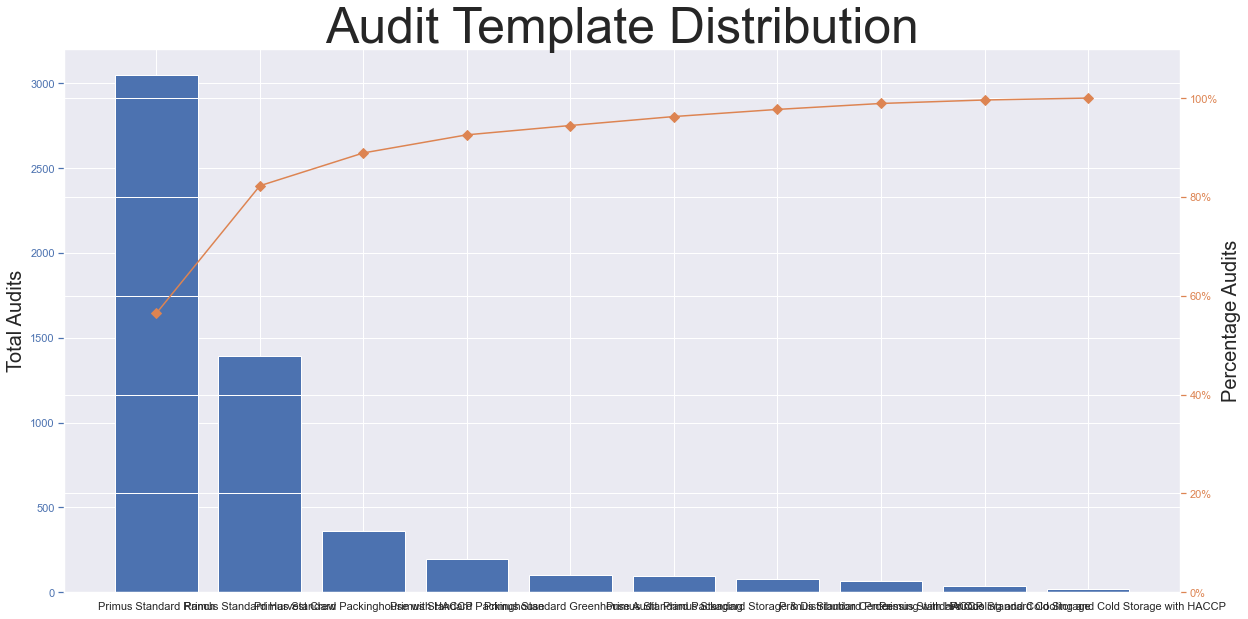

In [5]:
from matplotlib.ticker import PercentFormatter
at_group = dataframeCB.groupby(['AuditTemplate']).count()
at_group['AuditTemplate'] = at_group.index
at_group = at_group[['AuditTemplate','CBID']]
at_group = at_group.reset_index(drop=True)
at_group = at_group.rename(columns={'CBID':'TotalAudits'})

at_group = at_group.sort_values(by='TotalAudits',ascending=False)
at_group["AGGpercentage"] = at_group["TotalAudits"].cumsum()/at_group["TotalAudits"].sum()*100


fig, ax = plt.subplots(figsize= (20,10))
ax.bar(at_group['AuditTemplate'], at_group["TotalAudits"], color="C0")
ax.set_ylabel('Total Audits', fontsize = 20)
ax2 = ax.twinx()
ax2.plot(at_group['AuditTemplate'], at_group["AGGpercentage"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.set_ylim([0,110])
ax2.set_ylabel('Percentage Audits', fontsize = 20)

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.title('Audit Template Distribution', fontsize = 50)


plt.show()

In [6]:
at_group

,AuditTemplate,TotalAudits,AGGpercentage
8,Primus Standard Ranch,3051,56.447734
3,Primus Standard Harvest Crew,1395,82.257169
6,Primus Standard Packinghouse with HACCP,359,88.899167
5,Primus Standard Packinghouse,198,92.562442
2,Primus Standard Greenhouse Audit,102,94.449584
4,Primus Standard Packaging,98,96.262720
9,Primus Standard Storage & Distribution Center,78,97.705828
7,Primus Standard Processing with HACCP,65,98.908418
0,Primus Standard Cooling and Cold Storage,38,99.611471
1,Primus Standard Cooling and Cold Storage with ...,21,100.000000


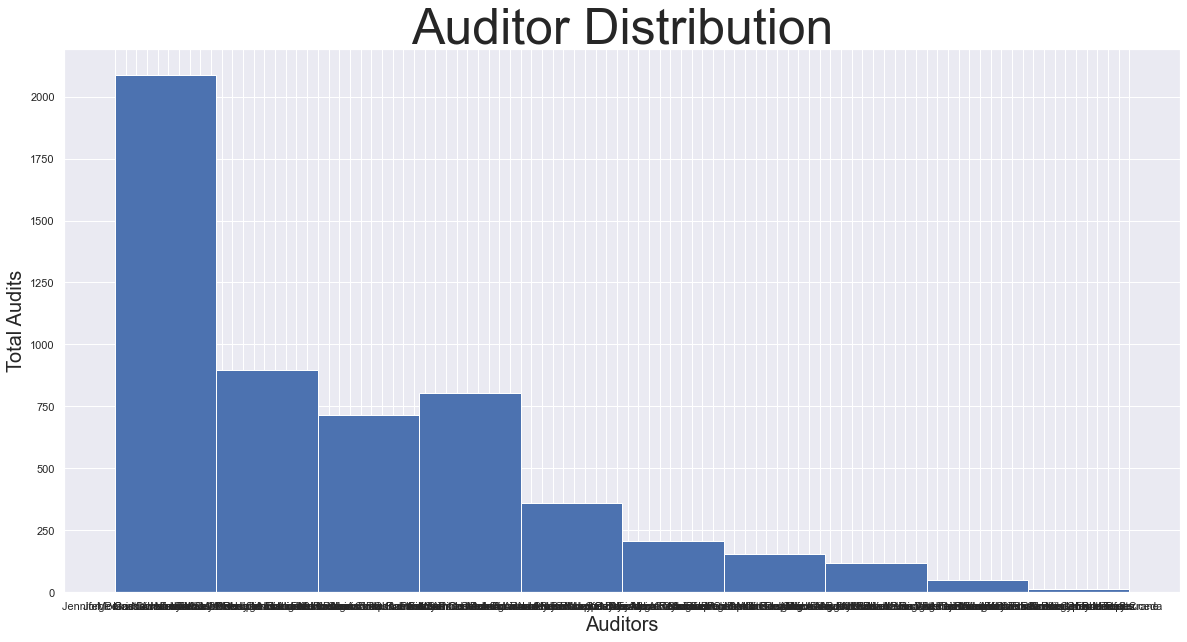

In [7]:
ax1 = plt.figure(figsize= (20,10))

Auditor_group = dataframeCB.astype({"Auditor": str})
plt.hist(Auditor_group['Auditor'])
plt.title('Auditor Distribution', fontsize = 50)
plt.xlabel('Auditors', fontsize = 20)
plt.ylabel('Total Audits', fontsize = 20)

plt.show()

In [8]:
dataframeCB['Auditor'].value_counts()

Julie Totoraitis                      352
Cathy Pinto                           350
Jorge Garcia                          327
Alvaro Soto                           303
Jeffrey Mass                          292
                                     ... 
Ana Cristina Diaz Lara                  1
Megan Shoenfelt                         1
Terry Crane                             1
Laura Edith Ramirez Luquin Marquez      1
Ashley Bell                             1
Name: Auditor, Length: 95, dtype: int64

In [9]:
df = dataframe
df['year'] = pd.DatetimeIndex(df['AuditDate']).year
df = df[df['year']==Year]
lastYear = Year - 1
df_2 = dataframe[dataframe['year']==lastYear]
#df['AuditTemplate'].value_counts()

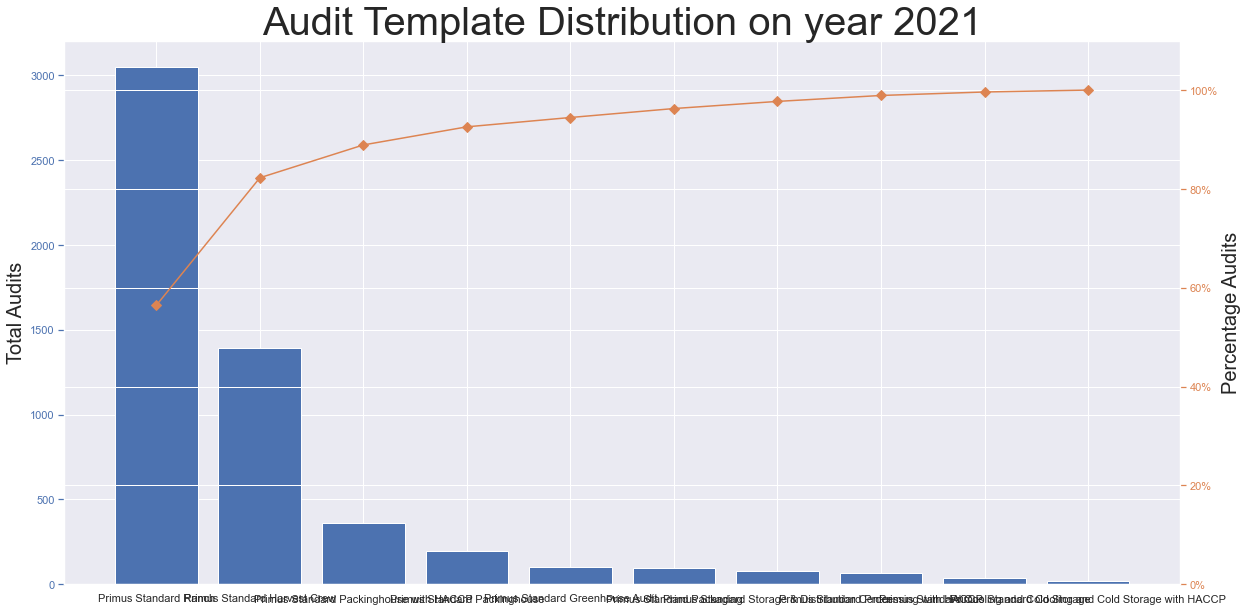

In [10]:
dfCB = dataframeCB
at_group = dfCB.groupby(['AuditTemplate']).count()
at_group['AuditTemplate'] = at_group.index
at_group = at_group[['AuditTemplate','CBID']]
at_group = at_group.reset_index(drop=True)
at_group = at_group.rename(columns={'CBID':'TotalAudits'})

at_group = at_group.sort_values(by='TotalAudits',ascending=False)
at_group["AGGpercentage"] = at_group["TotalAudits"].cumsum()/at_group["TotalAudits"].sum()*100


fig, ax = plt.subplots(figsize= (20,10))
ax.bar(at_group['AuditTemplate'], at_group["TotalAudits"], color="C0")
ax.set_ylabel('Total Audits', fontsize = 20)
ax2 = ax.twinx()
ax2.plot(at_group['AuditTemplate'], at_group["AGGpercentage"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.set_ylim([0,110])
ax2.set_ylabel('Percentage Audits', fontsize = 20)

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.title('Audit Template Distribution on year ' + str(Year), fontsize = 40)


plt.show()

In [11]:
at_group

,AuditTemplate,TotalAudits,AGGpercentage
8,Primus Standard Ranch,3051,56.447734
3,Primus Standard Harvest Crew,1395,82.257169
6,Primus Standard Packinghouse with HACCP,359,88.899167
5,Primus Standard Packinghouse,198,92.562442
2,Primus Standard Greenhouse Audit,102,94.449584
4,Primus Standard Packaging,98,96.262720
9,Primus Standard Storage & Distribution Center,78,97.705828
7,Primus Standard Processing with HACCP,65,98.908418
0,Primus Standard Cooling and Cold Storage,38,99.611471
1,Primus Standard Cooling and Cold Storage with ...,21,100.000000


# KPI 1 and 2

### Low and High Proportion of NC

In [12]:
x = df[['Auditor','AuditTemplate','id','PercentageNC']]
x = x.groupby(['id','Auditor','AuditTemplate']).mean()
x = pd.DataFrame(x) 
x = x.rename(columns={'PercentageNC':'AVG_PercentageNC'})
#x.head()

## Greenhouse

In [13]:
greenhouse = df[df['AuditTemplate'].str.contains("Greenhouse", case=False)]
greenhouse = greenhouse[['Auditor','PercentageNC']]
greenhouse = greenhouse.groupby('Auditor').mean()

### Distribution of Greenhouse Audits

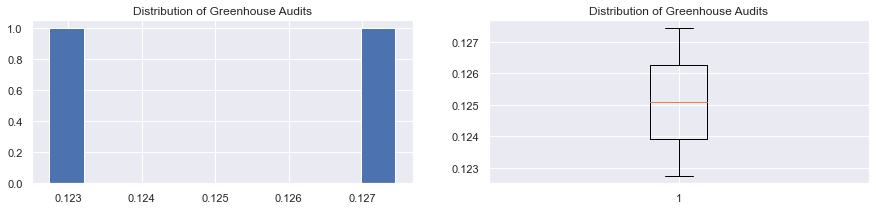

In [14]:
f, (ax1, ax2) = plt.subplots(1,2, sharey=False, figsize= (15,3))
ax1.hist(greenhouse['PercentageNC'])
ax1.set_title('Distribution of Greenhouse Audits')
ax2.boxplot(greenhouse['PercentageNC'])
ax2.set_title('Distribution of Greenhouse Audits')

plt.show()

### Calculating KPIs

In [15]:
mean_greenhouse = np.mean(greenhouse.PercentageNC)
q1_gh = np.percentile(greenhouse.PercentageNC, 25)
q2_gh = np.percentile(greenhouse.PercentageNC, 50)
q3_gh = np.percentile(greenhouse.PercentageNC, 75)

IQR_gh = q3_gh - q1_gh

UpperThreshold_gh = q3_gh + HighProportionNC_restriction * IQR_gh
LowerThreshold_gh = q1_gh - LowProportionNC_restriction * IQR_gh
if LowerThreshold_gh < 0:
    LowerThreshold_gh = greenhouse['PercentageNC'].min()
else:
    LowerThreshold_gh = LowerThreshold_gh

In [16]:
gh_analyzed = greenhouse
gh_analyzed['UpperThreshold'] = UpperThreshold_gh
gh_analyzed['HighProportionNC'] = ''
gh_analyzed.loc[gh_analyzed['PercentageNC'] > gh_analyzed['UpperThreshold'], 'HighProportionNC'] = 1
gh_analyzed.loc[gh_analyzed['PercentageNC'] <= gh_analyzed['UpperThreshold'], 'HighProportionNC'] = 0

In [17]:
gh_analyzed['LowProportionNC'] = ''
gh_analyzed['LowerThreshold'] = LowerThreshold_gh
gh_analyzed.loc[gh_analyzed['PercentageNC'] < gh_analyzed['LowerThreshold'], 'LowProportionNC'] = 1
gh_analyzed.loc[gh_analyzed['PercentageNC'] >= gh_analyzed['LowerThreshold'], 'LowProportionNC'] = 0

In [18]:
low_gh = gh_analyzed['LowProportionNC']
high_gh = gh_analyzed['HighProportionNC']
gh_analyzed = pd.merge(low_gh, high_gh, on='Auditor', suffixes=('_1', '_2'))
#gh_analyzed.head()

### Visualization of KPI

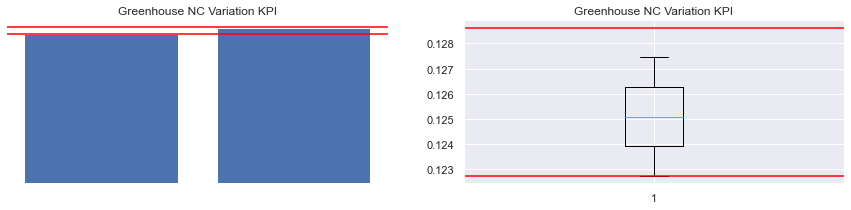

In [19]:
gh2 = greenhouse
gh2['Auditor'] = greenhouse.index

f, (ax1, ax2) = plt.subplots(1,2, sharey=False, figsize= (15,3))
ax1.bar(gh2.Auditor,gh2.PercentageNC)
ax1.set_xlabel('Auditors', size = 13,)
ax1.set_ylabel('Mean ProportionNC', size = 13,)
ax1.set_title('Greenhouse NC Variation KPI')
ax1.axhline(y=UpperThreshold_gh, xmin=0, color = 'red')
ax1.axhline(y=LowerThreshold_gh, xmin=0, color = 'red')
ax1.axis('off')
ax2.boxplot(gh2['PercentageNC'])
ax2.set_title('Greenhouse NC Variation KPI')
ax2.axhline(y=UpperThreshold_gh, xmin=0, color = 'red')
ax2.axhline(y=LowerThreshold_gh, xmin=0, color = 'red')

plt.show() 

In [20]:
#greenhouse[['PercentageNC','UpperThreshold','HighProportionNC','LowerThreshold','LowProportionNC']]

In [21]:
#greenhouse[['PercentageNC','UpperThreshold','HighProportionNC','LowerThreshold','LowProportionNC']]
mark_gh = greenhouse[(greenhouse.HighProportionNC == 1) | (greenhouse.LowProportionNC) == 1] == True
#mark_gh[['HighProportionNC','LowProportionNC']]

## Ranch

In [22]:
ranch = df[df['AuditTemplate'].str.contains("Ranch", case=False)]
ranch = ranch[['Auditor','PercentageNC']]
ranch = ranch.groupby('Auditor').mean()

### Distribution of Ranch's Audits

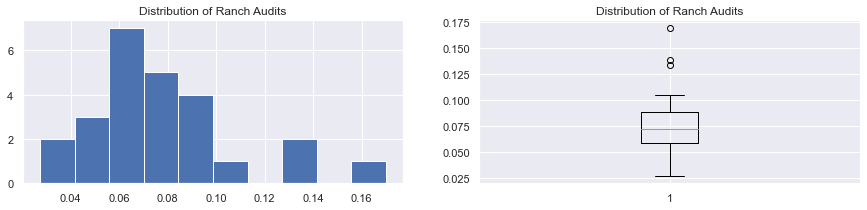

In [23]:
f, (ax1, ax2) = plt.subplots(1,2, sharey=False, figsize= (15,3))
ax1.hist(ranch['PercentageNC'])
ax1.set_title('Distribution of Ranch Audits')
ax2.boxplot(ranch['PercentageNC'])
ax2.set_title('Distribution of Ranch Audits')

plt.show()

### Calculating KPIs

In [24]:
mean_ranch = np.mean(ranch.PercentageNC)
q1_rch = np.percentile(ranch.PercentageNC, 25)
q2_rch = np.percentile(ranch.PercentageNC, 50)
q3_rch = np.percentile(ranch.PercentageNC, 75)

IQR_rch = q3_rch - q1_rch

UpperThreshold_rch = q3_rch + HighProportionNC_restriction * IQR_rch
LowerThreshold_rch = q1_rch - LowProportionNC_restriction * IQR_rch
if LowerThreshold_rch < 0:
    LowerThreshold_rch = ranch['PercentageNC'].min()
else:
    LowerThreshold_rch = LowerThreshold_rch

In [25]:
rch_analyzed = ranch
rch_analyzed['UpperThreshold'] = UpperThreshold_rch
rch_analyzed['HighProportionNC'] = ''
rch_analyzed.loc[rch_analyzed['PercentageNC'] > rch_analyzed['UpperThreshold'], 'HighProportionNC'] = 1
rch_analyzed.loc[rch_analyzed['PercentageNC'] <= rch_analyzed['UpperThreshold'], 'HighProportionNC'] = 0

In [26]:
rch_analyzed['LowProportionNC'] = ''
rch_analyzed['LowerThreshold'] = LowerThreshold_rch
rch_analyzed.loc[rch_analyzed['PercentageNC'] < rch_analyzed['LowerThreshold'], 'LowProportionNC'] = 1
rch_analyzed.loc[rch_analyzed['PercentageNC'] >= rch_analyzed['LowerThreshold'], 'LowProportionNC'] = 0

In [27]:
low_rch = rch_analyzed['LowProportionNC']
high_rch = rch_analyzed['HighProportionNC']
rch_analyzed = pd.merge(low_rch, high_rch, on='Auditor', suffixes=('_1', '_2'))
#rch_analyzed.head()

### Visualization of KPI

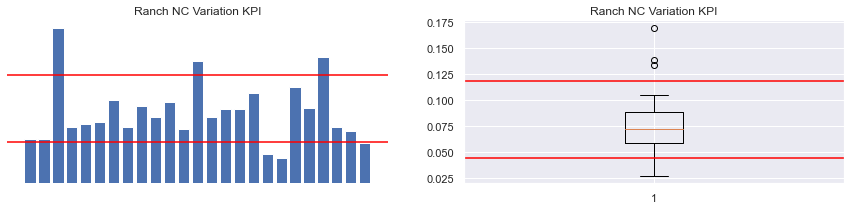

In [28]:
rch2 = ranch
rch2['Auditor'] = ranch.index

f, (ax1, ax2) = plt.subplots(1,2, sharey=False, figsize= (15,3))
ax1.bar(rch2.Auditor,rch2.PercentageNC)
ax1.set_title('Ranch NC Variation KPI')
ax1.axhline(y=UpperThreshold_rch, xmin=0, color = 'red')
ax1.axhline(y=LowerThreshold_rch, xmin=0, color = 'red')
ax1.axis('off')
ax2.boxplot(rch2['PercentageNC'])
ax2.set_title('Ranch NC Variation KPI')
ax2.axhline(y=UpperThreshold_rch, xmin=0, color = 'red')
ax2.axhline(y=LowerThreshold_rch, xmin=0, color = 'red')

plt.show() 

In [29]:
#ranch[['PercentageNC','UpperThreshold','HighProportionNC','LowerThreshold','LowProportionNC']]
mark_rch = ranch[(ranch.HighProportionNC == 1) | (ranch.LowProportionNC) == 1] == True
#mark_rch[['HighProportionNC','LowProportionNC']]

## Cooling and Cold Storage

In [30]:
cold = df[df['AuditTemplate'].str.contains("Cooling and Cold Storage", case=False)]
cold = cold[['Auditor','PercentageNC']]
cold = cold.groupby('Auditor').mean()

### Distribution of Cooling and Cold Storage Audits

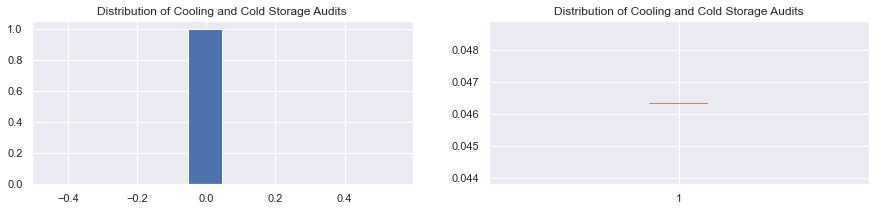

In [31]:
f, (ax1, ax2) = plt.subplots(1,2, sharey=False, figsize= (15,3))
ax1.hist(cold['PercentageNC'])
ax1.set_title('Distribution of Cooling and Cold Storage Audits')
ax2.boxplot(cold['PercentageNC'])
ax2.set_title('Distribution of Cooling and Cold Storage Audits')

plt.show()

### Calculating KPIs

In [32]:
mean_cold = np.mean(cold.PercentageNC)
q1_cld = np.percentile(cold.PercentageNC, 25)
q2_cld = np.percentile(cold.PercentageNC, 50)
q3_cld = np.percentile(cold.PercentageNC, 75)

IQR_cld = q3_cld - q1_cld

UpperThreshold_cld = q3_cld + HighProportionNC_restriction * IQR_cld
LowerThreshold_cld = q1_cld - LowProportionNC_restriction * IQR_cld
if LowerThreshold_cld < 0:
    LowerThreshold_cld = cold['PercentageNC'].min()
else:
    LowerThreshold_cld = LowerThreshold_cld

In [33]:
cld_analyzed = cold
cld_analyzed['UpperThreshold'] = UpperThreshold_cld
cld_analyzed['HighProportionNC'] = ''
cld_analyzed.loc[cld_analyzed['PercentageNC'] > cld_analyzed['UpperThreshold'], 'HighProportionNC'] = 1
cld_analyzed.loc[cld_analyzed['PercentageNC'] <= cld_analyzed['UpperThreshold'], 'HighProportionNC'] = 0

In [34]:
cld_analyzed['LowProportionNC'] = ''
cld_analyzed['LowerThreshold'] = LowerThreshold_cld
cld_analyzed.loc[cld_analyzed['PercentageNC'] < cld_analyzed['LowerThreshold'], 'LowProportionNC'] = 1
cld_analyzed.loc[cld_analyzed['PercentageNC'] >= cld_analyzed['LowerThreshold'], 'LowProportionNC'] = 0

In [35]:
low_cld = cld_analyzed['LowProportionNC']
high_cld = cld_analyzed['HighProportionNC']
cld_analyzed = pd.merge(low_cld, high_cld, on='Auditor', suffixes=('_1', '_2'))
#cld_analyzed.head()

### Visualization of KPI

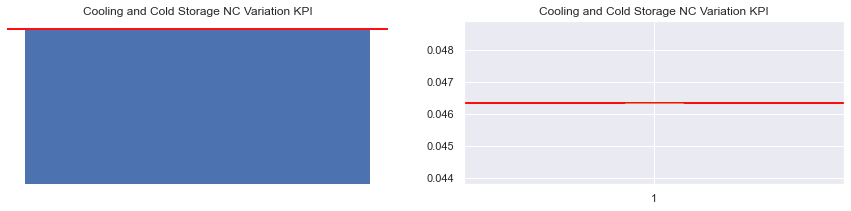

In [36]:
cld2 = cold
cld2['Auditor'] = cold.index

f, (ax1, ax2) = plt.subplots(1,2, sharey=False, figsize= (15,3))
ax1.bar(cld2.Auditor,cld2.PercentageNC)
ax1.set_title('Cooling and Cold Storage NC Variation KPI')
ax1.axhline(y=UpperThreshold_cld, xmin=0, color = 'red')
ax1.axhline(y=LowerThreshold_cld, xmin=0, color = 'red')
ax1.axis('off')
ax2.boxplot(cld2['PercentageNC'])
ax2.set_title('Cooling and Cold Storage NC Variation KPI')
ax2.axhline(y=UpperThreshold_cld, xmin=0, color = 'red')
ax2.axhline(y=LowerThreshold_cld, xmin=0, color = 'red')

plt.show()  

In [37]:
#cold[['PercentageNC','UpperThreshold','HighProportionNC','LowerThreshold','LowProportionNC']]
mark_cld = cold[(cold.HighProportionNC == 1) | (cold.LowProportionNC) == 1] == True
#mark_cld[['HighProportionNC','LowProportionNC']]

## Harvest Crew

In [38]:
harvc = df[df['AuditTemplate'].str.contains("Harvest Crew", case=False)]
harvc = harvc[['Auditor','PercentageNC']]
harvc = harvc.groupby('Auditor').mean()

### Distribution of Harvest Crew's Audits

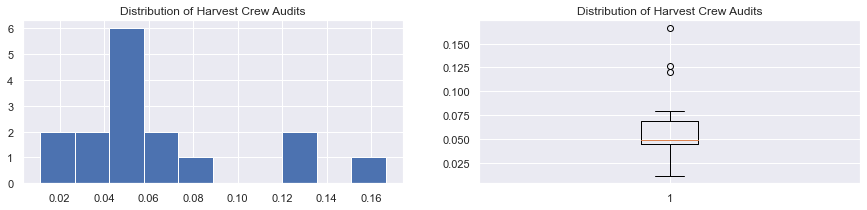

In [39]:
f, (ax1, ax2) = plt.subplots(1,2, sharey=False, figsize= (15,3))
ax1.hist(harvc['PercentageNC'])
ax1.set_title('Distribution of Harvest Crew Audits')
ax2.boxplot(harvc['PercentageNC'])
ax2.set_title('Distribution of Harvest Crew Audits')

plt.show()

### Calculating KPIs

In [40]:
mean_harvc = np.mean(harvc.PercentageNC)
q1_hc = np.percentile(harvc.PercentageNC, 25)
q2_hc = np.percentile(harvc.PercentageNC, 50)
q3_hc = np.percentile(harvc.PercentageNC, 75)

IQR_hc = q3_hc - q1_hc

UpperThreshold_hc = q3_hc + HighProportionNC_restriction * IQR_hc
LowerThreshold_hc = q1_hc - LowProportionNC_restriction * IQR_hc
if LowerThreshold_hc < 0:
    LowerThreshold_hc = harvc['PercentageNC'].min()
else:
    LowerThreshold_hc = LowerThreshold_hc

In [41]:
hc_analyzed = harvc
hc_analyzed['UpperThreshold'] = UpperThreshold_hc
hc_analyzed['HighProportionNC'] = ''
hc_analyzed.loc[hc_analyzed['PercentageNC'] > hc_analyzed['UpperThreshold'], 'HighProportionNC'] = 1
hc_analyzed.loc[hc_analyzed['PercentageNC'] <= hc_analyzed['UpperThreshold'], 'HighProportionNC'] = 0

In [42]:
hc_analyzed['LowProportionNC'] = ''
hc_analyzed['LowerThreshold'] = LowerThreshold_hc
hc_analyzed.loc[hc_analyzed['PercentageNC'] < hc_analyzed['LowerThreshold'], 'LowProportionNC'] = 1
hc_analyzed.loc[hc_analyzed['PercentageNC'] >= hc_analyzed['LowerThreshold'], 'LowProportionNC'] = 0

In [43]:
low_hc = hc_analyzed['LowProportionNC']
high_hc = hc_analyzed['HighProportionNC']
hc_analyzed = pd.merge(low_hc, high_hc, on='Auditor', suffixes=('_1', '_2'))
#hc_analyzed.head()

### Visualization of KPI

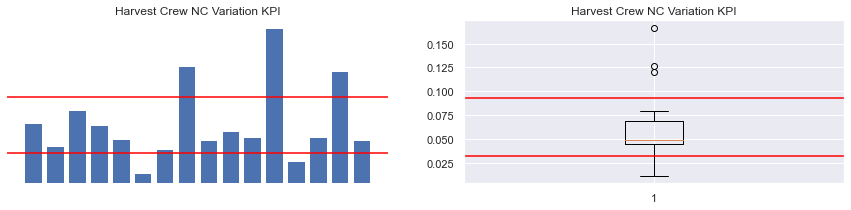

In [44]:
hc2 = harvc
hc2['Auditor'] = harvc.index

f, (ax1, ax2) = plt.subplots(1,2, sharey=False, figsize= (15,3))
ax1.bar(hc2.Auditor,hc2.PercentageNC)
ax1.set_title('Harvest Crew NC Variation KPI')
ax1.axhline(y=UpperThreshold_hc, xmin=0, color = 'red')
ax1.axhline(y=LowerThreshold_hc, xmin=0, color = 'red')
ax1.axis('off')
ax2.boxplot(hc2['PercentageNC'])
ax2.set_title('Harvest Crew NC Variation KPI')
ax2.axhline(y=UpperThreshold_hc, xmin=0, color = 'red')
ax2.axhline(y=LowerThreshold_hc, xmin=0, color = 'red')

plt.show()  

In [45]:
#harvc[['PercentageNC','UpperThreshold','HighProportionNC','LowerThreshold','LowProportionNC']]
mark_hc = harvc[(harvc.HighProportionNC == 1) | (harvc.LowProportionNC) == 1] == True
#mark_hc[['HighProportionNC','LowProportionNC']]

## Packinghouse

In [46]:
packinghouse = df[df['AuditTemplate'].str.contains("Packinghouse", case=False)]
packinghouse = packinghouse[['Auditor','PercentageNC']]
packinghouse = packinghouse.groupby('Auditor').mean()

### Distribution of Packinghouse's Audits

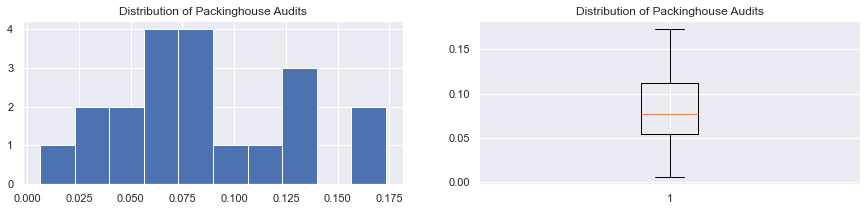

In [47]:
f, (ax1, ax2) = plt.subplots(1,2, sharey=False, figsize= (15,3))
ax1.hist(packinghouse['PercentageNC'])
ax1.set_title('Distribution of Packinghouse Audits')
ax2.boxplot(packinghouse['PercentageNC'])
ax2.set_title('Distribution of Packinghouse Audits')

plt.show()

### Calculating KPIs

In [48]:
mean_packinghouse = np.mean(packinghouse.PercentageNC)
q1_pkh = np.percentile(packinghouse.PercentageNC, 25)
q2_pkh = np.percentile(packinghouse.PercentageNC, 50)
q3_pkh = np.percentile(packinghouse.PercentageNC, 75)

IQR_pkh = q3_pkh - q1_pkh

UpperThreshold_pkh = q3_pkh + HighProportionNC_restriction * IQR_pkh
LowerThreshold_pkh = q1_pkh - LowProportionNC_restriction * IQR_pkh
if LowerThreshold_pkh < 0:
    LowerThreshold_pkh = packinghouse['PercentageNC'].min()
else:
    LowerThreshold_pkh = LowerThreshold_pkh

In [49]:
pkh_analyzed = packinghouse
pkh_analyzed['UpperThreshold'] = UpperThreshold_pkh
pkh_analyzed['HighProportionNC'] = ''
pkh_analyzed.loc[pkh_analyzed['PercentageNC'] > pkh_analyzed['UpperThreshold'], 'HighProportionNC'] = 1
pkh_analyzed.loc[pkh_analyzed['PercentageNC'] <= pkh_analyzed['UpperThreshold'], 'HighProportionNC'] = 0

In [50]:
pkh_analyzed['LowProportionNC'] = ''
pkh_analyzed['LowerThreshold'] = LowerThreshold_pkh
pkh_analyzed.loc[pkh_analyzed['PercentageNC'] < pkh_analyzed['LowerThreshold'], 'LowProportionNC'] = 1
pkh_analyzed.loc[pkh_analyzed['PercentageNC'] >= pkh_analyzed['LowerThreshold'], 'LowProportionNC'] = 0

In [51]:
low_pkh = pkh_analyzed['LowProportionNC']
high_pkh = pkh_analyzed['HighProportionNC']
pkh_analyzed = pd.merge(low_pkh, high_pkh, on='Auditor', suffixes=('_1', '_2'))
#pkh_analyzed.head()

### Visualization of KPI

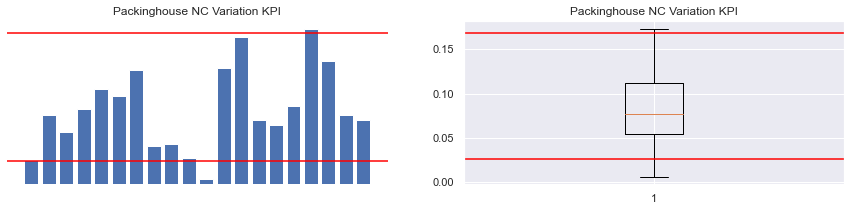

In [52]:
pkh2 = packinghouse
pkh2['Auditor'] = packinghouse.index

f, (ax1, ax2) = plt.subplots(1,2, sharey=False, figsize= (15,3))
ax1.bar(pkh2.Auditor,pkh2.PercentageNC)
ax1.set_title('Packinghouse NC Variation KPI')
ax1.axhline(y=UpperThreshold_pkh, xmin=0, color = 'red')
ax1.axhline(y=LowerThreshold_pkh, xmin=0, color = 'red')
ax1.axis('off')
ax2.boxplot(pkh2['PercentageNC'])
ax2.set_title('Packinghouse NC Variation KPI')
ax2.axhline(y=UpperThreshold_pkh, xmin=0, color = 'red')
ax2.axhline(y=LowerThreshold_pkh, xmin=0, color = 'red')

plt.show()  

In [53]:
#packinghouse[['PercentageNC','UpperThreshold','HighProportionNC','LowerThreshold','LowProportionNC']]
mark_pkh = packinghouse[(packinghouse.HighProportionNC == 1) | (packinghouse.LowProportionNC) == 1] == True
#mark_pkh[['HighProportionNC','LowProportionNC']]

## Packaging

In [54]:
packaging = df[df['AuditTemplate'].str.contains("Packaging", case=False)]
packaging = packaging[['Auditor','PercentageNC']]
packaging = packaging.groupby('Auditor').mean()

### Distribution of Packaging's Audits

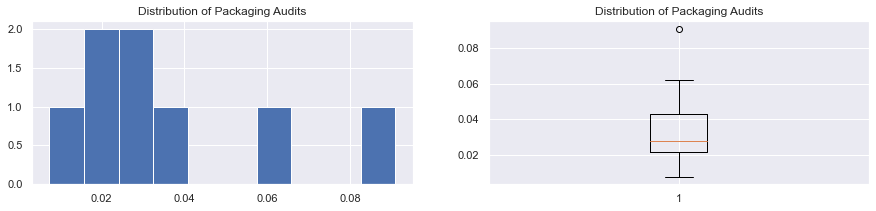

In [55]:
f, (ax1, ax2) = plt.subplots(1,2, sharey=False, figsize= (15,3))
ax1.hist(packaging['PercentageNC'])
ax1.set_title('Distribution of Packaging Audits')
ax2.boxplot(packaging['PercentageNC'])
ax2.set_title('Distribution of Packaging Audits')

plt.show()

### Calculating KPIs

In [56]:
mean_packaging = np.mean(packaging.PercentageNC)
q1_pk = np.percentile(packaging.PercentageNC, 25)
q2_pk = np.percentile(packaging.PercentageNC, 50)
q3_pk = np.percentile(packaging.PercentageNC, 75)

IQR_pk = q3_pk - q1_pk

UpperThreshold_pk = q3_pk + HighProportionNC_restriction * IQR_pk
LowerThreshold_pk = q1_pk - LowProportionNC_restriction * IQR_pk
if LowerThreshold_pk < 0:
    LowerThreshold_pk = packaging['PercentageNC'].min()
else:
    LowerThreshold_pk = LowerThreshold_pk

In [57]:
pk_analyzed = packaging
pk_analyzed['UpperThreshold'] = UpperThreshold_pk
pk_analyzed['HighProportionNC'] = ''
pk_analyzed.loc[pk_analyzed['PercentageNC'] > pk_analyzed['UpperThreshold'], 'HighProportionNC'] = 1
pk_analyzed.loc[pk_analyzed['PercentageNC'] <= pk_analyzed['UpperThreshold'], 'HighProportionNC'] = 0

In [58]:
pk_analyzed['LowProportionNC'] = ''
pk_analyzed['LowerThreshold'] = LowerThreshold_pk
pk_analyzed.loc[pk_analyzed['PercentageNC'] < pk_analyzed['LowerThreshold'], 'LowProportionNC'] = 1
pk_analyzed.loc[pk_analyzed['PercentageNC'] >= pk_analyzed['LowerThreshold'], 'LowProportionNC'] = 0

In [59]:
low_pk = pk_analyzed['LowProportionNC']
high_pk = pk_analyzed['HighProportionNC']
pk_analyzed = pd.merge(low_pk, high_pk, on='Auditor', suffixes=('_1', '_2'))
#pk_analyzed.head()

### Visualization of KPI

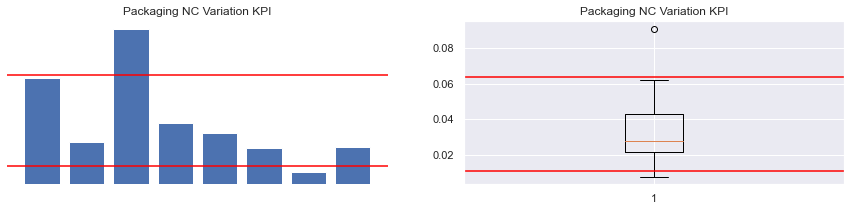

In [60]:
pk2 = packaging
pk2['Auditor'] = packaging.index

f, (ax1, ax2) = plt.subplots(1,2, sharey=False, figsize= (15,3))
ax1.bar(pk2.Auditor,pk2.PercentageNC)
ax1.set_title('Packaging NC Variation KPI')
ax1.axhline(y=UpperThreshold_pk, xmin=0, color = 'red')
ax1.axhline(y=LowerThreshold_pk, xmin=0, color = 'red')
ax1.axis('off')
ax2.boxplot(pk2['PercentageNC'])
ax2.set_title('Packaging NC Variation KPI')
ax2.axhline(y=UpperThreshold_pk, xmin=0, color = 'red')
ax2.axhline(y=LowerThreshold_pk, xmin=0, color = 'red')

plt.show()  

In [61]:
#packaging[['PercentageNC','UpperThreshold','HighProportionNC','LowerThreshold','LowProportionNC']]
mark_pk = packaging[(packaging.HighProportionNC == 1) | (packaging.LowProportionNC) == 1] == True
#mark_pk[['HighProportionNC','LowProportionNC']]

## Storage & Distribution Center

In [62]:
storage = df[df['AuditTemplate'].str.contains("Storage & Distribution Center", case=False)]
storage = storage[['Auditor','PercentageNC']]
storage = storage.groupby('Auditor').mean()

### Distribution of Storage & Distribution Center's Audits

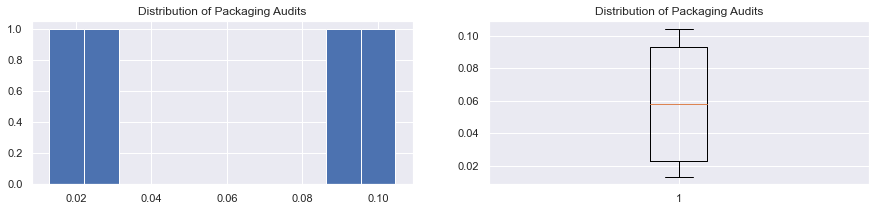

In [63]:
f, (ax1, ax2) = plt.subplots(1,2, sharey=False, figsize= (15,3))
ax1.hist(storage['PercentageNC'])
ax1.set_title('Distribution of Packaging Audits')
ax2.boxplot(storage['PercentageNC'])
ax2.set_title('Distribution of Packaging Audits')

plt.show()

### Calculating KPI

In [64]:
mean_storage = np.mean(storage.PercentageNC)
q1_sd = np.percentile(storage.PercentageNC, 25)
q2_sd = np.percentile(storage.PercentageNC, 50)
q3_sd = np.percentile(storage.PercentageNC, 75)

IQR_sd = q3_sd - q1_sd

UpperThreshold_sd = q3_sd + HighProportionNC_restriction * IQR_sd
LowerThreshold_sd = q1_sd - LowProportionNC_restriction * IQR_sd
if LowerThreshold_sd < 0:
    LowerThreshold_sd = storage['PercentageNC'].min()
else:
    LowerThreshold_sd = LowerThreshold_sd

In [65]:
sd_analyzed = storage
sd_analyzed['UpperThreshold'] = UpperThreshold_sd
sd_analyzed['HighProportionNC'] = ''
sd_analyzed.loc[sd_analyzed['PercentageNC'] > sd_analyzed['UpperThreshold'], 'HighProportionNC'] = 1
sd_analyzed.loc[sd_analyzed['PercentageNC'] <= sd_analyzed['UpperThreshold'], 'HighProportionNC'] = 0

In [66]:
sd_analyzed['LowProportionNC'] = ''
sd_analyzed['LowerThreshold'] = LowerThreshold_sd
sd_analyzed.loc[sd_analyzed['PercentageNC'] < sd_analyzed['LowerThreshold'], 'LowProportionNC'] = 1
sd_analyzed.loc[sd_analyzed['PercentageNC'] >= sd_analyzed['LowerThreshold'], 'LowProportionNC'] = 0

In [67]:
low_sd = sd_analyzed['LowProportionNC']
high_sd = sd_analyzed['HighProportionNC']
sd_analyzed = pd.merge(low_sd, high_sd, on='Auditor', suffixes=('_1', '_2'))
#sd_analyzed.head()

### Visualization of KPI

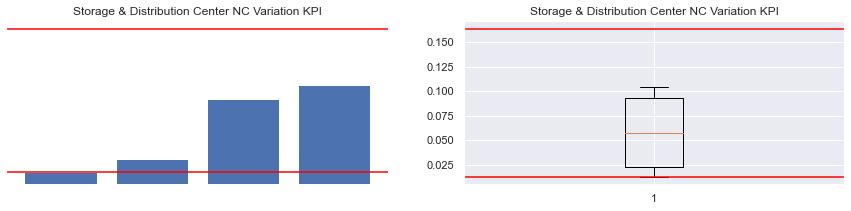

In [68]:
sd2 = storage
sd2['Auditor'] = storage.index

f, (ax1, ax2) = plt.subplots(1,2, sharey=False, figsize= (15,3))
ax1.bar(sd2.Auditor,sd2.PercentageNC)
ax1.set_title('Storage & Distribution Center NC Variation KPI')
ax1.axhline(y=UpperThreshold_sd, xmin=0, color = 'red')
ax1.axhline(y=LowerThreshold_sd, xmin=0, color = 'red')
ax1.axis('off')
ax2.boxplot(sd2['PercentageNC'])
ax2.set_title('Storage & Distribution Center NC Variation KPI')
ax2.axhline(y=UpperThreshold_sd, xmin=0, color = 'red')
ax2.axhline(y=LowerThreshold_sd, xmin=0, color = 'red')

plt.show()  

In [69]:
#storage[['PercentageNC','UpperThreshold','HighProportionNC','LowerThreshold','LowProportionNC']]
mark_sd = storage[(storage.HighProportionNC == 1) | (storage.LowProportionNC) == 1] == True
#mark_sd[['HighProportionNC','LowProportionNC']]

# KPI 3 and 4

## Low and High Variation of NC

In [70]:
y = df[['Auditor','AuditTemplate','id','PercentageNC']]
y = y.groupby(['id']).std()
y = pd.DataFrame(y) 
y = y.rename(columns={'PercentageNC':'STD_PercentageNC'})
#y

In [71]:
y = df[['Auditor','AuditTemplate','id','PercentageNC']]
y = y.groupby(['id','Auditor','AuditTemplate']).std()
y = pd.DataFrame(y) 
y = y.rename(columns={'PercentageNC':'STD_PercentageNC'})
#y.head()

## Greenhouse

In [72]:
greenhouseSTD = df[df['AuditTemplate'].str.contains("Greenhouse", case=False)]
greenhouseSTD = greenhouseSTD[['Auditor','PercentageNC']]
greenhouseSTD = greenhouseSTD.groupby('Auditor').std()
greenhouseSTD = greenhouseSTD.rename(columns={'PercentageNC':'StdNC'})
greenhouseSTD = greenhouseSTD.dropna()
#greenhouseSTD

### Distribution of Variance of NC  

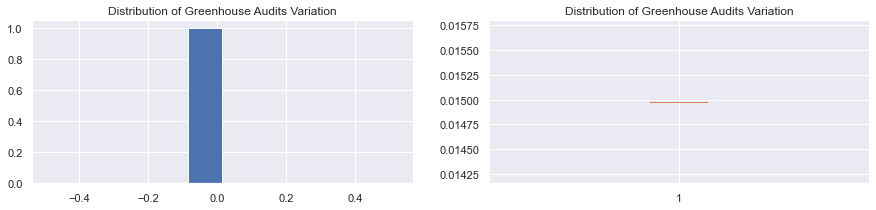

In [73]:
f, (ax1, ax2) = plt.subplots(1,2, sharey=False, figsize= (15,3))
ax1.hist(greenhouseSTD['StdNC'])
ax1.set_title('Distribution of Greenhouse Audits Variation')
ax2.boxplot(greenhouseSTD['StdNC'])
ax2.set_title('Distribution of Greenhouse Audits Variation')

plt.show()

### Calculating KPI

In [74]:
meanSTD_greenhouse = np.mean(greenhouseSTD.StdNC)
q1_ghs = np.percentile(greenhouseSTD.StdNC, 25)
q2_ghs = np.percentile(greenhouseSTD.StdNC, 50)
q3_ghs = np.percentile(greenhouseSTD.StdNC, 75)

IQR_ghs = q3_ghs - q1_ghs

UpperThreshold_ghs = q3_ghs + HighVariationNC_restriction * IQR_ghs
LowerThreshold_ghs = q1_ghs - LowVariationNC_restriction * IQR_ghs
if LowerThreshold_ghs < 0:
    LowerThreshold_ghs = greenhouseSTD['StdNC'].min()
else:
    LowerThreshold_ghs = LowerThreshold_ghs

In [75]:
ghs_analyzed = greenhouseSTD
ghs_analyzed['UpperThreshold'] = UpperThreshold_ghs
ghs_analyzed['HighProportionNC'] = ''
ghs_analyzed.loc[ghs_analyzed['StdNC'] > ghs_analyzed['UpperThreshold'], 'HighProportionNC'] = 1
ghs_analyzed.loc[ghs_analyzed['StdNC'] <= ghs_analyzed['UpperThreshold'], 'HighProportionNC'] = 0

In [76]:
ghs_analyzed['LowProportionNC'] = ''
ghs_analyzed['LowerThreshold'] = LowerThreshold_ghs
ghs_analyzed.loc[ghs_analyzed['StdNC'] < ghs_analyzed['LowerThreshold'], 'LowProportionNC'] = 1
ghs_analyzed.loc[ghs_analyzed['StdNC'] >= ghs_analyzed['LowerThreshold'], 'LowProportionNC'] = 0

In [77]:
low_ghs = ghs_analyzed['LowProportionNC']
high_ghs = ghs_analyzed['HighProportionNC']
ghs_analyzed = pd.merge(low_ghs, high_ghs, on='Auditor', suffixes=('_1', '_2'))
ghs_analyzed = ghs_analyzed.rename(columns={'HighProportionNC':'HighVariationNC','LowProportionNC':'LowVariationNC'})
#ghs_analyzed.head()

### Visualization of KPI

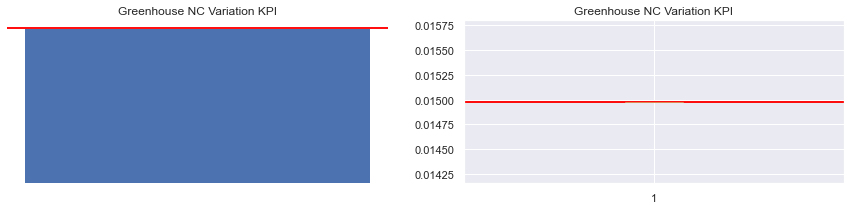

In [78]:
ghs2 = greenhouseSTD
ghs2['Auditor'] = greenhouseSTD.index

f, (ax1, ax2) = plt.subplots(1,2, sharey=False, figsize= (15,3))
ax1.bar(ghs2.Auditor,ghs2.StdNC)
ax1.set_title('Greenhouse NC Variation KPI')
ax1.axhline(y=UpperThreshold_ghs, xmin=0, color = 'red')
ax1.axhline(y=LowerThreshold_ghs, xmin=0, color = 'red')
ax1.axis('off')
ax2.boxplot(ghs2['StdNC'])
ax2.set_title('Greenhouse NC Variation KPI')
ax2.axhline(y=UpperThreshold_ghs, xmin=0, color = 'red')
ax2.axhline(y=LowerThreshold_ghs, xmin=0, color = 'red')

plt.show()  

In [79]:
#greenhouseSTD[['StdNC','UpperThreshold','HighVariationNC','LowerThreshold','LowVariationNC']]
greenhouseSTD = greenhouseSTD.rename(columns={'HighProportionNC':'HighVariationNC','LowProportionNC':'LowVariationNC'})
mark_ghs = greenhouseSTD[(greenhouseSTD.HighVariationNC == 1) | (greenhouseSTD.LowVariationNC) == 1] == True
#mark_ghs[['HighVariationNC','LowVariationNC']]

## Ranch

In [80]:
ranchSTD = df[df['AuditTemplate'].str.contains("Ranch", case=False)]
ranchSTD = ranchSTD[['Auditor','PercentageNC']]
ranchSTD = ranchSTD.groupby('Auditor').std()
ranchSTD = ranchSTD.rename(columns={'PercentageNC':'StdNC'})
ranchSTD = ranchSTD.dropna()
#ranchSTD.head()

### Distribution of Variance NC Ranch

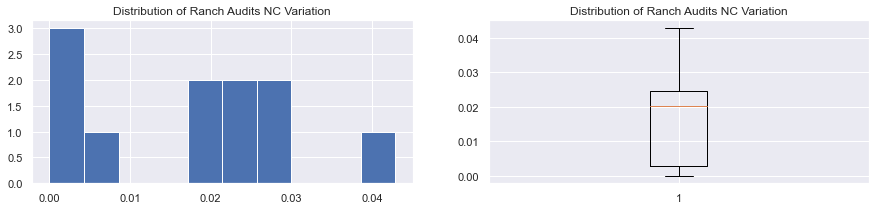

In [81]:
f, (ax1, ax2) = plt.subplots(1,2, sharey=False, figsize= (15,3))
ax1.hist(ranchSTD['StdNC'])
ax1.set_title('Distribution of Ranch Audits NC Variation')
ax2.boxplot(ranchSTD['StdNC'])
ax2.set_title('Distribution of Ranch Audits NC Variation')

plt.show()

### Calculating KPI

In [82]:
meanSTD_ranch = np.mean(ranchSTD.StdNC)
q1_rhs = np.percentile(ranchSTD.StdNC, 25)
q2_rhs = np.percentile(ranchSTD.StdNC, 50)
q3_rhs = np.percentile(ranchSTD.StdNC, 75)

IQR_rhs = q3_rhs - q1_rhs

UpperThreshold_rhs = q3_rhs + HighVariationNC_restriction * IQR_rhs
LowerThreshold_rhs = q1_rhs - LowVariationNC_restriction * IQR_rhs
if LowerThreshold_rhs < 0:
    LowerThreshold_rhs = ranchSTD['StdNC'].min()
else:
    LowerThreshold_rhs = LowerThreshold_rhs

In [83]:
rhs_analyzed = ranchSTD
rhs_analyzed['UpperThreshold'] = UpperThreshold_rhs
rhs_analyzed['HighProportionNC'] = ''
rhs_analyzed.loc[rhs_analyzed['StdNC'] > rhs_analyzed['UpperThreshold'], 'HighProportionNC'] = 1
rhs_analyzed.loc[rhs_analyzed['StdNC'] <= rhs_analyzed['UpperThreshold'], 'HighProportionNC'] = 0

In [84]:
rhs_analyzed['LowProportionNC'] = ''
rhs_analyzed['LowerThreshold'] = LowerThreshold_rhs
rhs_analyzed.loc[rhs_analyzed['StdNC'] < rhs_analyzed['LowerThreshold'], 'LowProportionNC'] = 1
rhs_analyzed.loc[rhs_analyzed['StdNC'] >= rhs_analyzed['LowerThreshold'], 'LowProportionNC'] = 0

In [85]:
low_rhs = rhs_analyzed['LowProportionNC']
high_rhs = rhs_analyzed['HighProportionNC']
rhs_analyzed = pd.merge(low_rhs, high_rhs, on='Auditor', suffixes=('_1', '_2'))
rhs_analyzed = rhs_analyzed.rename(columns={'HighProportionNC':'HighVariationNC','LowProportionNC':'LowVariationNC'})
#rhs_analyzed.head()

### Visualization of KPI

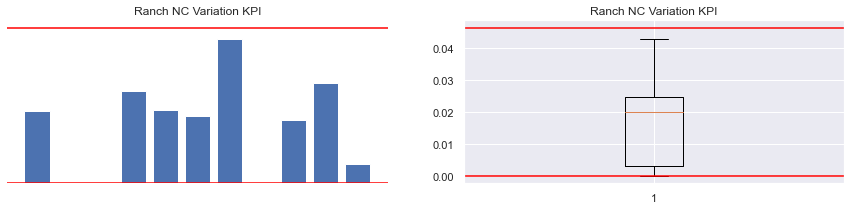

In [86]:
rhs2 = ranchSTD
rhs2['Auditor'] = ranchSTD.index

f, (ax1, ax2) = plt.subplots(1,2, sharey=False, figsize= (15,3))
ax1.bar(rhs2.Auditor,rhs2.StdNC)
ax1.set_title('Ranch NC Variation KPI')
ax1.axhline(y=UpperThreshold_rhs, xmin=0, color = 'red')
ax1.axhline(y=LowerThreshold_rhs, xmin=0, color = 'red')
ax1.axis('off')
ax2.boxplot(rhs2['StdNC'])
ax2.set_title('Ranch NC Variation KPI')
ax2.axhline(y=UpperThreshold_rhs, xmin=0, color = 'red')
ax2.axhline(y=LowerThreshold_rhs, xmin=0, color = 'red')

plt.show()  

In [87]:
#ranchSTD[['StdNC','UpperThreshold','HighVariationNC','LowerThreshold','LowVariationNC']]
ranchSTD = ranchSTD.rename(columns={'HighProportionNC':'HighVariationNC','LowProportionNC':'LowVariationNC'})
mark_rhs = ranchSTD[(ranchSTD.HighVariationNC == 1) | (ranchSTD.LowVariationNC) == 1] == True
#mark_rhs[['HighVariationNC','LowVariationNC']]

## Cooling and Cold Storage

In [88]:
coldSTD = df[df['AuditTemplate'].str.contains("Cooling and Cold Storage", case=False)]
coldSTD = coldSTD[['Auditor','PercentageNC']]
coldSTD = coldSTD.groupby('Auditor').std()
coldSTD = coldSTD.rename(columns={'PercentageNC':'StdNC'})
coldSTD = coldSTD.dropna()
#coldSTD.head()

### Distribution of NC Variation Cooling and Cold Storage Audits

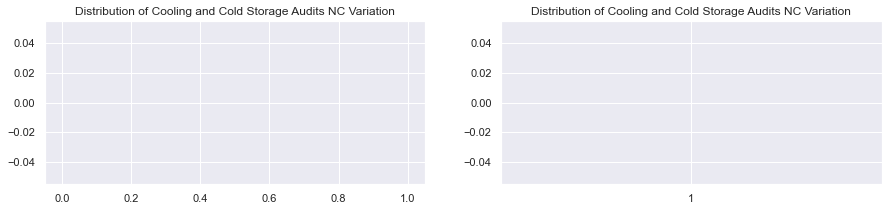

In [89]:
f, (ax1, ax2) = plt.subplots(1,2, sharey=False, figsize= (15,3))
ax1.hist(coldSTD['StdNC'])
ax1.set_title('Distribution of Cooling and Cold Storage Audits NC Variation')
ax2.boxplot(coldSTD['StdNC'])
ax2.set_title('Distribution of Cooling and Cold Storage Audits NC Variation')

plt.show()

### Calculating KPI

In [90]:
if coldSTD.empty:
    print('DataFrame is empty!')
else:
    meanSTD_cold = np.mean(coldSTD.StdNC)
    q1_cls = np.percentile(coldSTD.StdNC, 25)
    q2_cls = np.percentile(coldSTD.StdNC, 50)
    q3_cls = np.percentile(coldSTD.StdNC, 75)

    IQR_cls = q3_cls - q1_cls

    UpperThreshold_cls = q3_cls + HighVariationNC_restriction * IQR_cls
    LowerThreshold_cls = q1_cls - LowVariationNC_restriction * IQR_cls
    if LowerThreshold_cls < 0:
        LowerThreshold_cls = coldSTD['StdNC'].min()
    else:
        LowerThreshold_cls = LowerThreshold_cls

DataFrame is empty!


In [91]:
if coldSTD.empty:
    print('DataFrame is empty!')
else:    
    cls_analyzed = coldSTD
    cls_analyzed['UpperThreshold'] = UpperThreshold_cls
    cls_analyzed['HighProportionNC'] = ''
    cls_analyzed.loc[cls_analyzed['StdNC'] > cls_analyzed['UpperThreshold'], 'HighProportionNC'] = 1
    cls_analyzed.loc[cls_analyzed['StdNC'] <= cls_analyzed['UpperThreshold'], 'HighProportionNC'] = 0

DataFrame is empty!


In [92]:
if coldSTD.empty:
    print('DataFrame is empty!')
else:
    cls_analyzed['LowProportionNC'] = ''
    cls_analyzed['LowerThreshold'] = LowerThreshold_cls
    cls_analyzed.loc[cls_analyzed['StdNC'] < cls_analyzed['LowerThreshold'], 'LowProportionNC'] = 1
    cls_analyzed.loc[cls_analyzed['StdNC'] >= cls_analyzed['LowerThreshold'], 'LowProportionNC'] = 0

DataFrame is empty!


In [93]:
if coldSTD.empty:
    print('DataFrame is empty!')
else:
    low_cls = cls_analyzed['LowProportionNC']
    high_cls = cls_analyzed['HighProportionNC']
    cls_analyzed = pd.merge(low_cls, high_cls, on='Auditor', suffixes=('_1', '_2'))
    #cls_analyzed.head()

DataFrame is empty!


### Visualization of KPI

In [94]:
if coldSTD.empty:
    print('DataFrame is empty!')
else:        
    cls2 = coldSTD
    cls2['Auditor'] = coldSTD.index

    f, (ax1, ax2) = plt.subplots(1,2, sharey=False, figsize= (15,3))
    ax1.bar(cls2.Auditor,cls2.StdNC)
    ax1.set_title('Cooling and Cold Storage NC Variation KPI')
    ax1.axhline(y=UpperThreshold_cls, xmin=0, color = 'red')
    ax1.axhline(y=LowerThreshold_cls, xmin=0, color = 'red')
    ax1.axis('off')
    ax2.boxplot(cls2['StdNC'])
    ax2.set_title('Cooling and Cold Storage NC Variation KPI')
    ax2.axhline(y=UpperThreshold_cls, xmin=0, color = 'red')
    ax2.axhline(y=LowerThreshold_cls, xmin=0, color = 'red')

    plt.show()  

DataFrame is empty!


In [95]:
if coldSTD.empty:
    print('DataFrame is empty!')
else:
    #coldSTD[['StdNC','UpperThreshold','HighVariationNC','LowerThreshold','LowVariationNC']]
    coldSTD = coldSTD.rename(columns={'HighProportionNC':'HighVariationNC','LowProportionNC':'LowVariationNC'})
    mark_cls = coldSTD[(coldSTD.HighVariationNC == 1) | (coldSTD.LowVariationNC) == 1] == True
    #mark_cls[['HighVariationNC','LowVariationNC']]

DataFrame is empty!


## Harvest Crew

In [96]:
harvestSTD = df[df['AuditTemplate'].str.contains("Harvest Crew", case=False)]
harvestSTD = harvestSTD[['Auditor','PercentageNC']]
harvestSTD = harvestSTD.groupby('Auditor').std()
harvestSTD = harvestSTD.rename(columns={'PercentageNC':'StdNC'})
harvestSTD = harvestSTD.dropna()
#harvestSTD.head()

### Distribution of NC Variation in Harvest Crew Audits

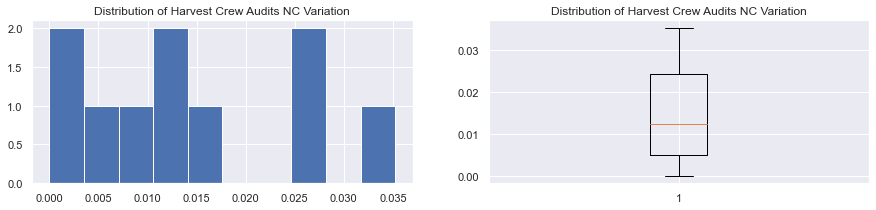

In [97]:
f, (ax1, ax2) = plt.subplots(1,2, sharey=False, figsize= (15,3))
ax1.hist(harvestSTD['StdNC'])
ax1.set_title('Distribution of Harvest Crew Audits NC Variation')
ax2.boxplot(harvestSTD['StdNC'])
ax2.set_title('Distribution of Harvest Crew Audits NC Variation')

plt.show()

### Calculating KPI

In [98]:
meanSTD_harvest = np.mean(harvestSTD.StdNC)
q1_hcs = np.percentile(harvestSTD.StdNC, 25)
q2_hcs = np.percentile(harvestSTD.StdNC, 50)
q3_hcs = np.percentile(harvestSTD.StdNC, 75)

IQR_hcs = q3_hcs - q1_hcs

UpperThreshold_hcs = q3_hcs + HighVariationNC_restriction * IQR_hcs
LowerThreshold_hcs = q1_hcs - LowVariationNC_restriction * IQR_hcs
if LowerThreshold_hcs < 0:
    LowerThreshold_hcs = harvestSTD['StdNC'].min()
else:
    LowerThreshold_hcs = LowerThreshold_hcs

In [99]:
hcs_analyzed = harvestSTD
hcs_analyzed['UpperThreshold'] = UpperThreshold_hcs
hcs_analyzed['HighProportionNC'] = ''
hcs_analyzed.loc[hcs_analyzed['StdNC'] > hcs_analyzed['UpperThreshold'], 'HighProportionNC'] = 1
hcs_analyzed.loc[hcs_analyzed['StdNC'] <= hcs_analyzed['UpperThreshold'], 'HighProportionNC'] = 0

In [100]:
hcs_analyzed['LowProportionNC'] = ''
hcs_analyzed['LowerThreshold'] = LowerThreshold_hcs
hcs_analyzed.loc[hcs_analyzed['StdNC'] < hcs_analyzed['LowerThreshold'], 'LowProportionNC'] = 1
hcs_analyzed.loc[hcs_analyzed['StdNC'] >= hcs_analyzed['LowerThreshold'], 'LowProportionNC'] = 0

In [101]:
low_hcs = hcs_analyzed['LowProportionNC']
high_hcs = hcs_analyzed['HighProportionNC']
hcs_analyzed = pd.merge(low_hcs, high_hcs, on='Auditor', suffixes=('_1', '_2'))
#hcs_analyzed.head()

### Visualization of KPI

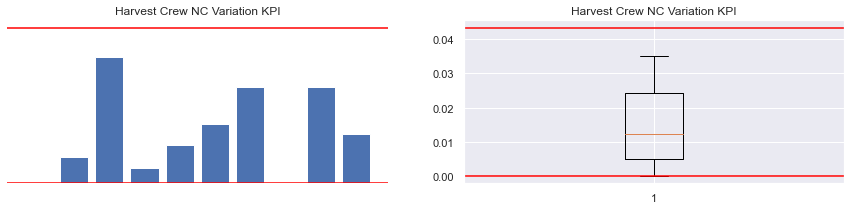

In [102]:
hcs2 = harvestSTD
hcs2['Auditor'] = harvestSTD.index

f, (ax1, ax2) = plt.subplots(1,2, sharey=False, figsize= (15,3))
ax1.bar(hcs2.Auditor,hcs2.StdNC)
ax1.set_title('Harvest Crew NC Variation KPI')
ax1.axhline(y=UpperThreshold_hcs, xmin=0, color = 'red')
ax1.axhline(y=LowerThreshold_hcs, xmin=0, color = 'red')
ax1.axis('off')
ax2.boxplot(hcs2['StdNC'])
ax2.set_title('Harvest Crew NC Variation KPI')
ax2.axhline(y=UpperThreshold_hcs, xmin=0, color = 'red')
ax2.axhline(y=LowerThreshold_hcs, xmin=0, color = 'red')

plt.show()  

In [103]:
#harvestSTD[['StdNC','UpperThreshold','HighVariationNC','LowerThreshold','LowVariationNC']]
harvestSTD = harvestSTD.rename(columns={'HighProportionNC':'HighVariationNC','LowProportionNC':'LowVariationNC'})
mark_hcs = harvestSTD[(harvestSTD.HighVariationNC == 1) | (harvestSTD.LowVariationNC) == 1] == True
#mark_hcs[['HighVariationNC','LowVariationNC']]

## Packinghouse

In [104]:
packinghouseSTD = df[df['AuditTemplate'].str.contains("Packinghouse", case=False)]
packinghouseSTD = packinghouseSTD[['Auditor','PercentageNC']]
packinghouseSTD = packinghouseSTD.groupby('Auditor').std()
packinghouseSTD = packinghouseSTD.rename(columns={'PercentageNC':'StdNC'})
packinghouseSTD = packinghouseSTD.dropna()
#packinghouseSTD.head()

### Distribution of NC Variation in Packinghouse Audits

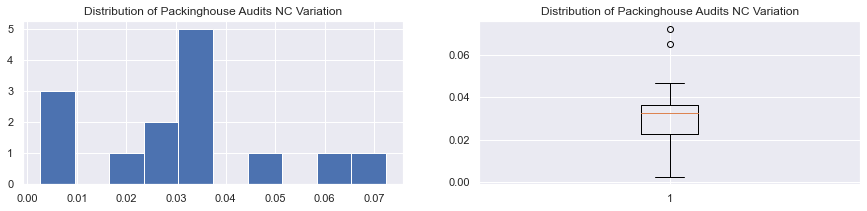

In [105]:
f, (ax1, ax2) = plt.subplots(1,2, sharey=False, figsize= (15,3))
ax1.hist(packinghouseSTD['StdNC'])
ax1.set_title('Distribution of Packinghouse Audits NC Variation')
ax2.boxplot(packinghouseSTD['StdNC'])
ax2.set_title('Distribution of Packinghouse Audits NC Variation')

plt.show()

### Calculating KPI

In [106]:
meanSTD_packinghouse = np.mean(packinghouseSTD.StdNC)
q1_pkhs = np.percentile(packinghouseSTD.StdNC, 25)
q2_pkhs = np.percentile(packinghouseSTD.StdNC, 50)
q3_pkhs = np.percentile(packinghouseSTD.StdNC, 75)

IQR_pkhs = q3_pkhs - q1_pkhs

UpperThreshold_pkhs = q3_pkhs + HighVariationNC_restriction * IQR_pkhs
LowerThreshold_pkhs = q1_pkhs - LowVariationNC_restriction * IQR_pkhs
if LowerThreshold_pkhs < 0:
    LowerThreshold_pkhs = packinghouseSTD['StdNC'].min()
else:
    LowerThreshold_pkhs = LowerThreshold_pkhs

In [107]:
pkhs_analyzed = packinghouseSTD
pkhs_analyzed['UpperThreshold'] = UpperThreshold_pkhs
pkhs_analyzed['HighProportionNC'] = ''
pkhs_analyzed.loc[pkhs_analyzed['StdNC'] > pkhs_analyzed['UpperThreshold'], 'HighProportionNC'] = 1
pkhs_analyzed.loc[pkhs_analyzed['StdNC'] <= pkhs_analyzed['UpperThreshold'], 'HighProportionNC'] = 0

In [108]:
pkhs_analyzed['LowProportionNC'] = ''
pkhs_analyzed['LowerThreshold'] = LowerThreshold_pkhs
pkhs_analyzed.loc[pkhs_analyzed['StdNC'] < pkhs_analyzed['LowerThreshold'], 'LowProportionNC'] = 1
pkhs_analyzed.loc[pkhs_analyzed['StdNC'] >= pkhs_analyzed['LowerThreshold'], 'LowProportionNC'] = 0

In [109]:
low_pkhs = pkhs_analyzed['LowProportionNC']
high_pkhs = pkhs_analyzed['HighProportionNC']
pkhs_analyzed = pd.merge(low_pkhs, high_pkhs, on='Auditor', suffixes=('_1', '_2'))
#pkhs_analyzed.head()

### Visualization of KPI

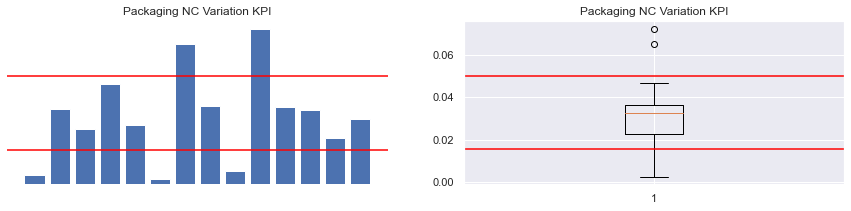

In [110]:
pkhs2 = packinghouseSTD
pkhs2['Auditor'] = packinghouseSTD.index

f, (ax1, ax2) = plt.subplots(1,2, sharey=False, figsize= (15,3))
ax1.bar(pkhs2.Auditor,pkhs2.StdNC)
ax1.set_title('Packaging NC Variation KPI')
ax1.axhline(y=UpperThreshold_pkhs, xmin=0, color = 'red')
ax1.axhline(y=LowerThreshold_pkhs, xmin=0, color = 'red')
ax1.axis('off')
ax2.boxplot(pkhs2['StdNC'])
ax2.set_title('Packaging NC Variation KPI')
ax2.axhline(y=UpperThreshold_pkhs, xmin=0, color = 'red')
ax2.axhline(y=LowerThreshold_pkhs, xmin=0, color = 'red')

plt.show()  

In [111]:
#packinghouseSTD[['StdNC','UpperThreshold','HighVariationNC','LowerThreshold','LowVariationNC']]
packinghouseSTD = packinghouseSTD.rename(columns={'HighProportionNC':'HighVariationNC','LowProportionNC':'LowVariationNC'})
mark_pkhs = packinghouseSTD[(packinghouseSTD.HighVariationNC == 1) | (packinghouseSTD.LowVariationNC) == 1] == True
#mark_pkhs[['HighVariationNC','LowVariationNC']]

### Packaging

In [112]:
packagingSTD = df[df['AuditTemplate'].str.contains("Packaging", case=False)]
packagingSTD = packagingSTD[['Auditor','PercentageNC']]
packagingSTD = packagingSTD.groupby('Auditor').std()
packagingSTD = packagingSTD.rename(columns={'PercentageNC':'StdNC'})
packagingSTD = packagingSTD.dropna()
#packagingSTD.head()

### Distribution of Variation NC in Packaging Audits

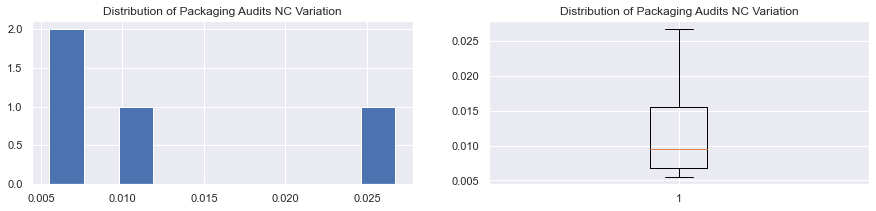

In [113]:
f, (ax1, ax2) = plt.subplots(1,2, sharey=False, figsize= (15,3))
ax1.hist(packagingSTD['StdNC'])
ax1.set_title('Distribution of Packaging Audits NC Variation')
ax2.boxplot(packagingSTD['StdNC'])
ax2.set_title('Distribution of Packaging Audits NC Variation')

plt.show()

### Calculating KPI

In [114]:
meanSTD_packaging = np.mean(packagingSTD.StdNC)
q1_pks = np.percentile(packagingSTD.StdNC, 25)
q2_pks = np.percentile(packagingSTD.StdNC, 50)
q3_pks = np.percentile(packagingSTD.StdNC, 75)

IQR_pks = q3_pks - q1_pks

UpperThreshold_pks = q3_pks + HighVariationNC_restriction * IQR_pks
LowerThreshold_pks = q1_pks - LowVariationNC_restriction * IQR_pks
if LowerThreshold_pks < 0:
    LowerThreshold_pks = packagingSTD['StdNC'].min()
else:
    LowerThreshold_pks = LowerThreshold_pks

In [115]:
pks_analyzed = packagingSTD
pks_analyzed['UpperThreshold'] = UpperThreshold_pks
pks_analyzed['HighProportionNC'] = ''
pks_analyzed.loc[pks_analyzed['StdNC'] > pks_analyzed['UpperThreshold'], 'HighProportionNC'] = 1
pks_analyzed.loc[pks_analyzed['StdNC'] <= pks_analyzed['UpperThreshold'], 'HighProportionNC'] = 0

In [116]:
pks_analyzed['LowProportionNC'] = ''
pks_analyzed['LowerThreshold'] = LowerThreshold_pks
pks_analyzed.loc[pks_analyzed['StdNC'] < pks_analyzed['LowerThreshold'], 'LowProportionNC'] = 1
pks_analyzed.loc[pks_analyzed['StdNC'] >= pks_analyzed['LowerThreshold'], 'LowProportionNC'] = 0

In [117]:
low_pks = pks_analyzed['LowProportionNC']
high_pks = pks_analyzed['HighProportionNC']
pks_analyzed = pd.merge(low_pks, high_pks, on='Auditor', suffixes=('_1', '_2'))
#pks_analyzed.head()

### Visualization of KPI

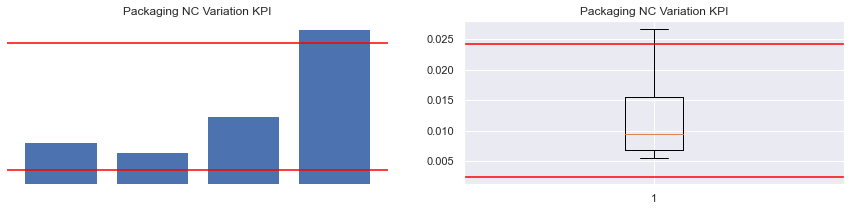

In [118]:
pks2 = packagingSTD
pks2['Auditor'] = packagingSTD.index

f, (ax1, ax2) = plt.subplots(1,2, sharey=False, figsize= (15,3))
ax1.bar(pks2.Auditor,pks2.StdNC)
ax1.set_title('Packaging NC Variation KPI')
ax1.axhline(y=UpperThreshold_pks, xmin=0, color = 'red')
ax1.axhline(y=LowerThreshold_pks, xmin=0, color = 'red')
ax1.axis('off')
ax2.boxplot(pks2['StdNC'])
ax2.set_title('Packaging NC Variation KPI')
ax2.axhline(y=UpperThreshold_pks, xmin=0, color = 'red')
ax2.axhline(y=LowerThreshold_pks, xmin=0, color = 'red')

plt.show()  

In [119]:
#packagingSTD[['StdNC','UpperThreshold','HighVariationNC','LowerThreshold','LowVariationNC']]
packagingSTD = packagingSTD.rename(columns={'HighProportionNC':'HighVariationNC','LowProportionNC':'LowVariationNC'})
mark_pks = packagingSTD[(packagingSTD.HighVariationNC == 1) | (packagingSTD.LowVariationNC) == 1] == True
#mark_pks[['HighVariationNC','LowVariationNC']]

## Storage & Distribution Center

In [120]:
storageSTD = df[df['AuditTemplate'].str.contains("Storage & Distribution Center", case=False)]
storageSTD = storageSTD[['Auditor','PercentageNC']]
storageSTD = storageSTD.groupby('Auditor').std()
storageSTD = storageSTD.rename(columns={'PercentageNC':'StdNC'})
storageSTD = storageSTD.dropna()
#storageSTD.head()

### Distribution of Variation NC in Storage & Distribution Center

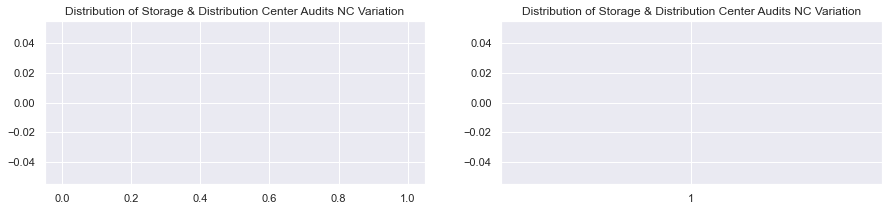

In [121]:
f, (ax1, ax2) = plt.subplots(1,2, sharey=False, figsize= (15,3))
ax1.hist(storageSTD['StdNC'])
ax1.set_title('Distribution of Storage & Distribution Center Audits NC Variation')
ax2.boxplot(storageSTD['StdNC'])
ax2.set_title('Distribution of Storage & Distribution Center Audits NC Variation')

plt.show()

### Calculating of KPI

In [122]:
if storageSTD.empty:
    print('DataFrame is empty!')
else:
    meanSTD_storage = np.mean(storageSTD.StdNC)
    q1_sts = np.percentile(storageSTD.StdNC, 25)
    q2_sts = np.percentile(storageSTD.StdNC, 50)
    q3_sts = np.percentile(storageSTD.StdNC, 75)

    IQR_sts = q3_sts - q1_sts

    UpperThreshold_sts = q3_sts + HighVariationNC_restriction * IQR_sts
    LowerThreshold_sts = q1_sts - LowVariationNC_restriction * IQR_sts
    if LowerThreshold_sts < storageSTD['StdNC'].min():
        LowerThreshold_sts = storageSTD['StdNC'].min()
    else:
        LowerThreshold_sts = LowerThreshold_sts

DataFrame is empty!


In [123]:
if storageSTD.empty:
    print('DataFrame is empty!')
else:
    sts_analyzed = storageSTD
    sts_analyzed['UpperThreshold'] = UpperThreshold_sts
    sts_analyzed['HighProportionNC'] = ''
    sts_analyzed.loc[sts_analyzed['StdNC'] > sts_analyzed['UpperThreshold'], 'HighProportionNC'] = 1
    sts_analyzed.loc[sts_analyzed['StdNC'] <= sts_analyzed['UpperThreshold'], 'HighProportionNC'] = 0

DataFrame is empty!


In [124]:
if storageSTD.empty:
    print('DataFrame is empty!')
else:
    sts_analyzed['LowProportionNC'] = ''
    sts_analyzed['LowerThreshold'] = LowerThreshold_sts
    sts_analyzed.loc[sts_analyzed['StdNC'] < sts_analyzed['LowerThreshold'], 'LowProportionNC'] = 1
    sts_analyzed.loc[sts_analyzed['StdNC'] >= sts_analyzed['LowerThreshold'], 'LowProportionNC'] = 0

DataFrame is empty!


In [125]:
if storageSTD.empty:
    print('DataFrame is empty!')
else:
    low_sts = sts_analyzed['LowProportionNC']
    high_sts = sts_analyzed['HighProportionNC']
    sts_analyzed = pd.merge(low_sts, high_sts, on='Auditor', suffixes=('_1', '_2'))
    #sts_analyzed.head()

DataFrame is empty!


### Visualization of KPI

In [126]:
if storageSTD.empty:
    print('DataFrame is empty!')
else:
    sts2 = storageSTD
    sts2['Auditor'] = storageSTD.index

    f, (ax1, ax2) = plt.subplots(1,2, sharey=False, figsize= (15,3))
    ax1.bar(sts2.Auditor,sts2.StdNC)
    ax1.set_title('Storage & Distribution Center NC Variation KPI')
    ax1.axhline(y=UpperThreshold_sts, xmin=0, color = 'red')
    ax1.axhline(y=LowerThreshold_sts, xmin=0, color = 'red')
    ax1.axis('off')
    ax2.boxplot(sts2['StdNC'])
    ax2.set_title('Storage & Distribution Center NC Variation KPI')
    ax2.axhline(y=UpperThreshold_sts, xmin=0, color = 'red')
    ax2.axhline(y=LowerThreshold_sts, xmin=0, color = 'red')

    plt.show()    

DataFrame is empty!


In [127]:
if storageSTD.empty:
    print('DataFrame is empty!')
else:
    #storageSTD[['StdNC','UpperThreshold','HighVariationNC','LowerThreshold','LowVariationNC']]
    storageSTD = storageSTD.rename(columns={'HighProportionNC':'HighVariationNC','LowProportionNC':'LowVariationNC'})
    mark_sts = storageSTD[(storageSTD.HighVariationNC == 1) | (storageSTD.LowVariationNC) == 1] == True
    #mark_sts[['HighVariationNC','LowVariationNC']]

DataFrame is empty!


In [128]:
if storageSTD.empty:
    print('DataFrame is empty!')
else:
    #storageSTD[['StdNC','UpperThreshold','HighVariationNC','LowerThreshold','LowVariationNC']]
    storageSTD = storageSTD.rename(columns={'HighProportionNC':'HighVariationNC','LowProportionNC':'LowVariationNC'})
    mark_sts = storageSTD[(storageSTD.HighVariationNC == 1) | (storageSTD.LowVariationNC) == 1] == True
    #mark_sts[['HighVariationNC','LowVariationNC']]

DataFrame is empty!


# KPI 5 and 6

### Change in NC in consecutive years 

## Ranch

In [129]:
ranch_2 = df_2[df_2['AuditTemplate'].str.contains("Ranch", case=False)]
ranch_2 = ranch_2[['Auditor','PercentageNC']]
ranch_2 = ranch_2.groupby('Auditor').mean()
ranch_1 = ranch[['Auditor','PercentageNC']]
ranch_1 = ranch_1.reset_index(drop=True)
ranch_12 = pd.merge(ranch_1, ranch_2, on='Auditor', suffixes=('_1', '_2'))
ranch_12['ChangeInAyear'] = np.absolute(ranch_12['PercentageNC_1'] - ranch_12['PercentageNC_2'])
#ranch_12.head()

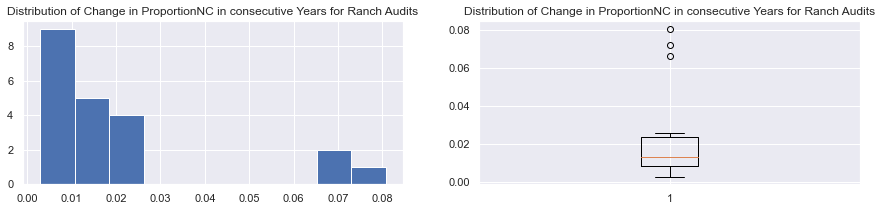

In [130]:
f, (ax1, ax2) = plt.subplots(1,2, sharey=False, figsize= (15,3))
ax1.hist(ranch_12['ChangeInAyear'])
ax1.set_title('Distribution of Change in ProportionNC in consecutive Years for Ranch Audits')
ax2.boxplot(ranch_12['ChangeInAyear'])
ax2.set_title('Distribution of Change in ProportionNC in consecutive Years for Ranch Audits')

plt.show()

### Calculating KPI

In [131]:
mean_packinghouse = np.mean(ranch_12.ChangeInAyear)
q1_rh12 = np.percentile(ranch_12.ChangeInAyear, 25)
q2_rh12 = np.percentile(ranch_12.ChangeInAyear, 50)
q3_rh12 = np.percentile(ranch_12.ChangeInAyear, 75)

IQR_rh12 = q3_rh12 - q1_rh12

UpperThreshold_rh12 = q3_rh12 + HighChangeinAYearNC_restriction * IQR_rh12
LowerThreshold_rh12 = q1_rh12 - LowChangeinAYearNC_restriction * IQR_rh12
if LowerThreshold_rh12 < 0:
    LowerThreshold_rh12 = ranch_12['ChangeInAyear'].min()
else:
    LowerThreshold_rh12 = LowerThreshold_rh12

In [132]:
rh12_analyzed = ranch_12
rh12_analyzed['UpperThreshold'] = UpperThreshold_rh12
rh12_analyzed['HighVariationNCinAYear'] = ''
rh12_analyzed.loc[rh12_analyzed['ChangeInAyear'] > rh12_analyzed['UpperThreshold'], 'HighVariationNCinAYear'] = 1
rh12_analyzed.loc[rh12_analyzed['ChangeInAyear'] <= rh12_analyzed['UpperThreshold'], 'HighVariationNCinAYear'] = 0

In [133]:
rh12_analyzed['LowVariationNCinAYear'] = ''
rh12_analyzed['LowerThreshold'] = LowerThreshold_rh12
rh12_analyzed.loc[rh12_analyzed['ChangeInAyear'] < rh12_analyzed['LowerThreshold'], 'LowVariationNCinAYear'] = 1
rh12_analyzed.loc[rh12_analyzed['ChangeInAyear'] >= rh12_analyzed['LowerThreshold'], 'LowVariationNCinAYear'] = 0

In [134]:
low_rh12 = rh12_analyzed[['Auditor','LowVariationNCinAYear']]
high_rh12 = rh12_analyzed[['Auditor','HighVariationNCinAYear']]
rh12_analyzed = pd.merge(low_rh12, high_rh12, on='Auditor', suffixes=('_1', '_2'))
#rh12_analyzed.head()

### Visualization of KPI

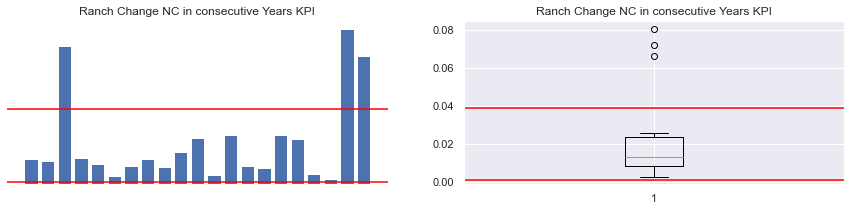

In [135]:
if ranch_12.empty:
    print('DataFrame is empty!')
else:
    rh12_2 = ranch_12

    f, (ax1, ax2) = plt.subplots(1,2, sharey=False, figsize= (15,3))
    ax1.bar(rh12_2.Auditor,rh12_2.ChangeInAyear)
    ax1.set_title('Ranch Change NC in consecutive Years KPI')
    ax1.axhline(y=UpperThreshold_rh12, xmin=0, color = 'red')
    ax1.axhline(y=LowerThreshold_rh12, xmin=0, color = 'red')
    ax1.axis('off')
    ax2.boxplot(rh12_2['ChangeInAyear'])
    ax2.set_title('Ranch Change NC in consecutive Years KPI')
    ax2.axhline(y=UpperThreshold_rh12, xmin=0, color = 'red')
    ax2.axhline(y=LowerThreshold_rh12, xmin=0, color = 'red')

    plt.show()    

In [136]:
if 'Auditor' in ranch_12:
    ranch_12.set_index('Auditor',inplace = True)
ranch_12['Auditor'] = ranch_12.index
ranch_12 = ranch_12.rename(columns={'PercentageNC_1':'PercentajeNC_2021','PercentageNC_2':'PercentageNC_2020'})
mark_rh12 = ranch_12[(ranch_12.HighVariationNCinAYear == 1) | (ranch_12.LowVariationNCinAYear) == 1] == True
#mark_rh12[['HighVariationNCinAYear','LowVariationNCinAYear']]

In [137]:
ranch12 = ranch_12[['Auditor','ChangeInAyear','UpperThreshold','HighVariationNCinAYear','LowerThreshold','LowVariationNCinAYear']]
#ranch_12

## Greenhouse

In [138]:
greenhouse_2 = df_2[df_2['AuditTemplate'].str.contains("Greenhouse", case=False)]
greenhouse_2 = greenhouse_2[['Auditor','PercentageNC']]
greenhouse_2 = greenhouse_2.groupby('Auditor').mean()
greenhouse_1 = greenhouse[['Auditor','PercentageNC']]
greenhouse_1 = greenhouse_1.reset_index(drop=True)
greenhouse_12 = pd.merge(greenhouse_1, greenhouse_2, on='Auditor', suffixes=('_1', '_2'))
greenhouse_12['ChangeInAyear'] = np.absolute(greenhouse_12['PercentageNC_1'] - greenhouse_12['PercentageNC_2'])
#greenhouse_12.head()

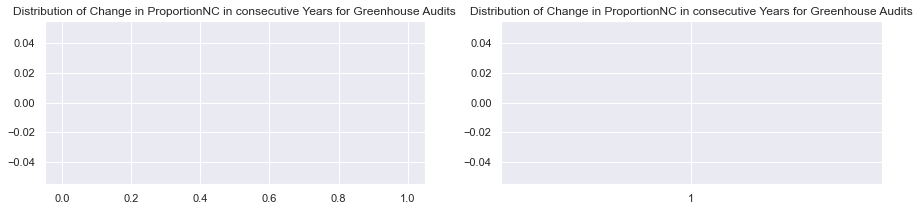

In [139]:
f, (ax1, ax2) = plt.subplots(1,2, sharey=False, figsize= (15,3))
ax1.hist(greenhouse_12['ChangeInAyear'])
ax1.set_title('Distribution of Change in ProportionNC in consecutive Years for Greenhouse Audits')
ax2.boxplot(greenhouse_12['ChangeInAyear'])
ax2.set_title('Distribution of Change in ProportionNC in consecutive Years for Greenhouse Audits')

plt.show()

### Calculating KPI

In [140]:
if greenhouse_12.empty:
    print('DataFrame is empty!')
else:
    mean_greenhouse = np.mean(greenhouse_12.ChangeInAyear)
    q1_gh12 = np.percentile(greenhouse_12.ChangeInAyear, 25)
    q2_gh12 = np.percentile(greenhouse_12.ChangeInAyear, 50)
    q3_gh12 = np.percentile(greenhouse_12.ChangeInAyear, 75)

    IQR_gh12 = q3_gh12 - q1_gh12

    UpperThreshold_gh12 = q3_gh12 + HighChangeinAYearNC_restriction * IQR_gh12
    LowerThreshold_gh12 = q1_gh12 - LowChangeinAYearNC_restriction * IQR_gh12
    if LowerThreshold_gh12 < 0:
        LowerThreshold_gh12 = greenhouse_12['ChangeInAyear'].min()
    else:
        LowerThreshold_gh12 = LowerThreshold_gh12

DataFrame is empty!


In [141]:
if greenhouse_12.empty:
    print('DataFrame is empty!')
else:
    gh12_analyzed = greenhouse_12
    gh12_analyzed['UpperThreshold'] = UpperThreshold_gh12
    gh12_analyzed['HighVariationNCinAYear'] = ''
    gh12_analyzed.loc[gh12_analyzed['ChangeInAyear'] > gh12_analyzed['UpperThreshold'], 'HighVariationNCinAYear'] = 1
    gh12_analyzed.loc[gh12_analyzed['ChangeInAyear'] <= gh12_analyzed['UpperThreshold'], 'HighVariationNCinAYear'] = 0

DataFrame is empty!


In [142]:
if greenhouse_12.empty:
    print('DataFrame is empty!')
else:
    gh12_analyzed['LowVariationNCinAYear'] = ''
    gh12_analyzed['LowerThreshold'] = LowerThreshold_gh12
    gh12_analyzed.loc[gh12_analyzed['ChangeInAyear'] < gh12_analyzed['LowerThreshold'], 'LowVariationNCinAYear'] = 1
    gh12_analyzed.loc[gh12_analyzed['ChangeInAyear'] >= gh12_analyzed['LowerThreshold'], 'LowVariationNCinAYear'] = 0

DataFrame is empty!


In [143]:
if greenhouse_12.empty:
    print('DataFrame is empty!')
else:
    low_gh12 = gh12_analyzed[['Auditor','LowVariationNCinAYear']]
    high_gh12 = gh12_analyzed[['Auditor','HighVariationNCinAYear']]
    gh12_analyzed = pd.merge(low_gh12, high_gh12, on='Auditor', suffixes=('_1', '_2'))
    #gh12_analyzed.head()

DataFrame is empty!


### Visualization of KPI

In [144]:
if greenhouse_12.empty:
    print('DataFrame is empty!')
else:
    gh12_2 = greenhouse_12

    f, (ax1, ax2) = plt.subplots(1,2, sharey=False, figsize= (15,3))
    ax1.bar(gh12_2.Auditor,gh12_2.ChangeInAyear)
    ax1.set_title('Greenhouse Change NC in consecutive Years KPI')
    ax1.axhline(y=UpperThreshold_gh12, xmin=0, color = 'red')
    ax1.axhline(y=LowerThreshold_gh12, xmin=0, color = 'red')
    ax1.axis('off')
    ax2.boxplot(gh12_2['ChangeInAyear'])
    ax2.set_title('Greenhouse Change NC in consecutive Years KPI')
    ax2.axhline(y=UpperThreshold_gh12, xmin=0, color = 'red')
    ax2.axhline(y=LowerThreshold_gh12, xmin=0, color = 'red')

    plt.show()    

DataFrame is empty!


In [145]:
if greenhouse_12.empty:
    print('DataFrame is empty!')
else:
    if 'Auditor' in greenhouse_12:
        greenhouse_12.set_index('Auditor',inplace = True)
    greenhouse_12['Auditor'] = greenhouse_12.index
    greenhouse_12 = greenhouse_12.rename(columns={'PercentageNC_1':'PercentajeNC_2021','PercentageNC_2':'PercentageNC_2020'})
    mark_gh12 = greenhouse_12[(greenhouse_12.HighVariationNCinAYear == 1) | (greenhouse_12.LowVariationNCinAYear) == 1] == True
    #mark_gh12[['HighVariationNCinAYear','LowVariationNCinAYear']]

DataFrame is empty!


In [146]:
if greenhouse_12.empty:
    print('DataFrame is empty!')
else:
    greenhouse_12 = greenhouse_12[['Auditor','ChangeInAyear','UpperThreshold','HighVariationNCinAYear','LowerThreshold','LowVariationNCinAYear']]
    #greenhouse_12

DataFrame is empty!


## Cooling and Cold Storage

In [147]:
cold_2 = df_2[df_2['AuditTemplate'].str.contains("Cooling and Cold Storage", case=False)]
cold_2 = cold_2[['Auditor','PercentageNC']]
cold_2 = cold_2.groupby('Auditor').mean()
cold_1 = cold[['Auditor','PercentageNC']]
cold_1 = cold_1.reset_index(drop=True)
cold_12 = pd.merge(cold_1, cold_2, on='Auditor', suffixes=('_1', '_2'))
cold_12['ChangeInAyear'] = np.absolute(cold_12['PercentageNC_1'] - cold_12['PercentageNC_2'])
#cold_12.head()

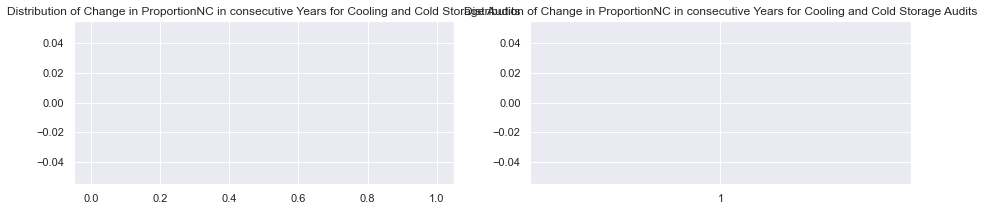

In [148]:
f, (ax1, ax2) = plt.subplots(1,2, sharey=False, figsize= (15,3))
ax1.hist(cold_12['ChangeInAyear'])
ax1.set_title('Distribution of Change in ProportionNC in consecutive Years for Cooling and Cold Storage Audits')
ax2.boxplot(cold_12['ChangeInAyear'])
ax2.set_title('Distribution of Change in ProportionNC in consecutive Years for Cooling and Cold Storage Audits')

plt.show()

### Calculating KPI

In [149]:
if cold_12.empty:
    print('DataFrame is empty!')
else:
    mean_coldStorage = np.mean(cold_12.ChangeInAyear)
    q1_cs12 = np.percentile(cold_12.ChangeInAyear, 25)
    q2_cs12 = np.percentile(cold_12.ChangeInAyear, 50)
    q3_cs12 = np.percentile(cold_12.ChangeInAyear, 75)

    IQR_cs12 = q3_cs12 - q1_cs12

    UpperThreshold_cs12 = q3_cs12 + HighChangeinAYearNC_restriction * IQR_cs12
    LowerThreshold_cs12 = q1_cs12 - LowChangeinAYearNC_restriction * IQR_cs12
    if LowerThreshold_cs12 < 0:
        LowerThreshold_cs12 = cold_12['ChangeInAyear'].min()
    else:
        LowerThreshold_cs12 = LowerThreshold_cs12

DataFrame is empty!


In [150]:
if cold_12.empty:
    print('DataFrame is empty!')
else:
    cs12_analyzed = cold_12
    cs12_analyzed['UpperThreshold'] = UpperThreshold_cs12
    cs12_analyzed['HighVariationNCinAYear'] = ''
    cs12_analyzed.loc[cs12_analyzed['ChangeInAyear'] > cs12_analyzed['UpperThreshold'], 'HighVariationNCinAYear'] = 1
    cs12_analyzed.loc[cs12_analyzed['ChangeInAyear'] <= cs12_analyzed['UpperThreshold'], 'HighVariationNCinAYear'] = 0

DataFrame is empty!


In [151]:
if cold_12.empty:
    print('DataFrame is empty!')
else:
    cs12_analyzed['LowVariationNCinAYear'] = ''
    cs12_analyzed['LowerThreshold'] = LowerThreshold_cs12
    cs12_analyzed.loc[cs12_analyzed['ChangeInAyear'] < cs12_analyzed['LowerThreshold'], 'LowVariationNCinAYear'] = 1
    cs12_analyzed.loc[cs12_analyzed['ChangeInAyear'] >= cs12_analyzed['LowerThreshold'], 'LowVariationNCinAYear'] = 0

DataFrame is empty!


In [152]:
if cold_12.empty:
    print('DataFrame is empty!')
else:
    low_cs12 = cs12_analyzed[['Auditor','LowVariationNCinAYear']]
    high_cs12 = cs12_analyzed[['Auditor','HighVariationNCinAYear']]
    cs12_analyzed = pd.merge(low_cs12, high_cs12, on='Auditor', suffixes=('_1', '_2'))
    #cs12_analyzed.head()

DataFrame is empty!


### Visualization of KPI

In [153]:
if cold_12.empty:
    print('DataFrame is empty!')
else:
    cs12_2 = cold_12

    f, (ax1, ax2) = plt.subplots(1,2, sharey=False, figsize= (15,3))
    ax1.bar(cs12_2.Auditor,cs12_2.ChangeInAyear)
    ax1.set_title('Cooling and Cold Storage Change NC in consecutive Years KPI')
    ax1.axhline(y=UpperThreshold_cs12, xmin=0, color = 'red')
    ax1.axhline(y=LowerThreshold_cs12, xmin=0, color = 'red')
    ax1.axis('off')
    ax2.boxplot(cold_12['ChangeInAyear'])
    ax2.set_title('Cooling and Cold Storage Change NC in consecutive Years KPI')
    ax2.axhline(y=UpperThreshold_cs12, xmin=0, color = 'red')
    ax2.axhline(y=LowerThreshold_cs12, xmin=0, color = 'red')

    plt.show()    

DataFrame is empty!


In [154]:
if cold_12.empty:
    print('DataFrame is empty!')
else:
    if 'Auditor' in cold_12:
        cold_12.set_index('Auditor',inplace = True)
    cold_12['Auditor'] = cold_12.index
    cold_12 = cold_12.rename(columns={'PercentageNC_1':'PercentajeNC_2021','PercentageNC_2':'PercentageNC_2020'})
    mark_cs12 = cold_12[(cold_12.HighVariationNCinAYear == 1) | (cold_12.LowVariationNCinAYear) == 1] == True
    #mark_cs12[['HighVariationNCinAYear','LowVariationNCinAYear']]

DataFrame is empty!


In [155]:
if cold_12.empty:
    print('DataFrame is empty!')
else:
    cold_12 = cold_12[['Auditor','ChangeInAyear','UpperThreshold','HighVariationNCinAYear','LowerThreshold','LowVariationNCinAYear']]
    #cold_12

DataFrame is empty!


## Harvest Crew

In [156]:
harv_2 = df_2[df_2['AuditTemplate'].str.contains("Harvest Crew", case=False)]
harv_2 = harv_2[['Auditor','PercentageNC']]
harv_2 = harv_2.groupby('Auditor').mean()
harv_1 = harvc[['Auditor','PercentageNC']]
harv_1 = harv_1.reset_index(drop=True)
harv_12 = pd.merge(harv_1, harv_2, on='Auditor', suffixes=('_1', '_2'))
harv_12['ChangeInAyear'] = np.absolute(harv_12['PercentageNC_1'] - harv_12['PercentageNC_2'])
#harv_12.head()

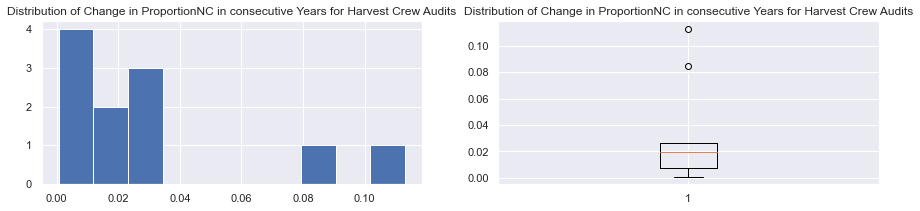

In [157]:
f, (ax1, ax2) = plt.subplots(1,2, sharey=False, figsize= (15,3))
ax1.hist(harv_12['ChangeInAyear'])
ax1.set_title('Distribution of Change in ProportionNC in consecutive Years for Harvest Crew Audits')
ax2.boxplot(harv_12['ChangeInAyear'])
ax2.set_title('Distribution of Change in ProportionNC in consecutive Years for Harvest Crew Audits')

plt.show()

In [158]:
mean_harv = np.mean(harv_12.ChangeInAyear)
q1_hc12 = np.percentile(harv_12.ChangeInAyear, 25)
q2_hc12 = np.percentile(harv_12.ChangeInAyear, 50)
q3_hc12 = np.percentile(harv_12.ChangeInAyear, 75)

IQR_hc12 = q3_hc12 - q1_hc12

UpperThreshold_hc12 = q3_hc12 + HighChangeinAYearNC_restriction * IQR_hc12
LowerThreshold_hc12 = q1_hc12 - LowChangeinAYearNC_restriction * IQR_hc12
if LowerThreshold_hc12 < 0:
    LowerThreshold_hc12 = harv_12['ChangeInAyear'].min()
else:
    LowerThreshold_hc12 = LowerThreshold_hc12

In [159]:
hc12_analyzed = harv_12
hc12_analyzed['UpperThreshold'] = UpperThreshold_hc12
hc12_analyzed['HighVariationNCinAYear'] = ''
hc12_analyzed.loc[hc12_analyzed['ChangeInAyear'] > hc12_analyzed['UpperThreshold'], 'HighVariationNCinAYear'] = 1
hc12_analyzed.loc[hc12_analyzed['ChangeInAyear'] <= hc12_analyzed['UpperThreshold'], 'HighVariationNCinAYear'] = 0

In [160]:
hc12_analyzed['LowVariationNCinAYear'] = ''
hc12_analyzed['LowerThreshold'] = LowerThreshold_hc12
hc12_analyzed.loc[hc12_analyzed['ChangeInAyear'] < hc12_analyzed['LowerThreshold'], 'LowVariationNCinAYear'] = 1
hc12_analyzed.loc[hc12_analyzed['ChangeInAyear'] >= hc12_analyzed['LowerThreshold'], 'LowVariationNCinAYear'] = 0

In [161]:
low_hc12 = hc12_analyzed[['Auditor','LowVariationNCinAYear']]
high_hc12 = hc12_analyzed[['Auditor','HighVariationNCinAYear']]
hc12_analyzed = pd.merge(low_hc12, high_hc12, on='Auditor', suffixes=('_1', '_2'))
#hc12_analyzed.head()

### Visualization of KPI

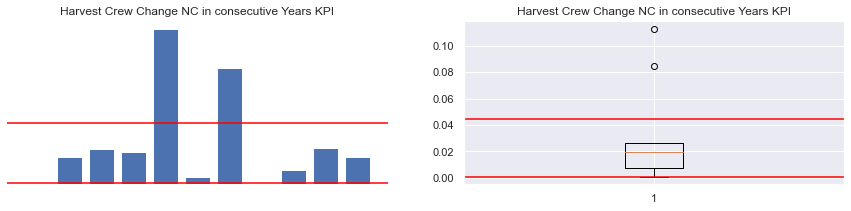

In [162]:
hc12_2 = harv_12

f, (ax1, ax2) = plt.subplots(1,2, sharey=False, figsize= (15,3))
ax1.bar(hc12_2.Auditor,hc12_2.ChangeInAyear)
ax1.set_title('Harvest Crew Change NC in consecutive Years KPI')
ax1.axhline(y=UpperThreshold_hc12, xmin=0, color = 'red')
ax1.axhline(y=LowerThreshold_hc12, xmin=0, color = 'red')
ax1.axis('off')
ax2.boxplot(harv_12['ChangeInAyear'])
ax2.set_title('Harvest Crew Change NC in consecutive Years KPI')
ax2.axhline(y=UpperThreshold_hc12, xmin=0, color = 'red')
ax2.axhline(y=LowerThreshold_hc12, xmin=0, color = 'red')

plt.show()

In [163]:
if 'Auditor' in harv_12:
    harv_12.set_index('Auditor',inplace = True)
harv_12['Auditor'] = harv_12.index
harv_12 = harv_12.rename(columns={'PercentageNC_1':'PercentajeNC_2021','PercentageNC_2':'PercentageNC_2020'})
mark_hc12 = harv_12[(harv_12.HighVariationNCinAYear == 1) | (harv_12.LowVariationNCinAYear) == 1] == True
#mark_hc12[['HighVariationNCinAYear','LowVariationNCinAYear']]

In [164]:
harv_12 = harv_12[['Auditor','ChangeInAyear','UpperThreshold','HighVariationNCinAYear','LowerThreshold','LowVariationNCinAYear']]
#harv_12

## Packinghouse

In [165]:
packinghouse_2 = df_2[df_2['AuditTemplate'].str.contains("Packinghouse", case=False)]
packinghouse_2 = packinghouse_2[['Auditor','PercentageNC']]
packinghouse_2 = packinghouse_2.groupby('Auditor').mean()
packinghouse_1 = packinghouse[['Auditor','PercentageNC']]
packinghouse_1 = packinghouse_1.reset_index(drop=True)
packinghouse_12 = pd.merge(packinghouse_1, packinghouse_2, on='Auditor', suffixes=('_1', '_2'))
packinghouse_12['ChangeInAyear'] = np.absolute(packinghouse_12['PercentageNC_1'] - packinghouse_12['PercentageNC_2'])
#packinghouse_12.head()

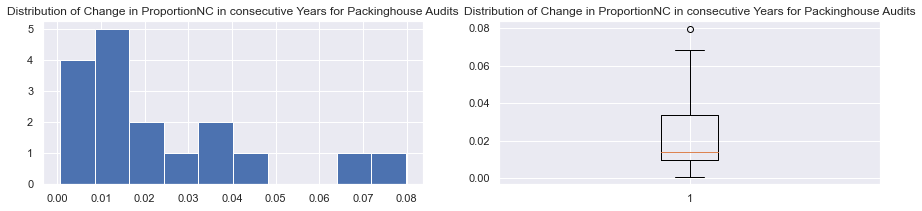

In [166]:
f, (ax1, ax2) = plt.subplots(1,2, sharey=False, figsize= (15,3))
ax1.hist(packinghouse_12['ChangeInAyear'])
ax1.set_title('Distribution of Change in ProportionNC in consecutive Years for Packinghouse Audits')
ax2.boxplot(packinghouse_12['ChangeInAyear'])
ax2.set_title('Distribution of Change in ProportionNC in consecutive Years for Packinghouse Audits')

plt.show()

### Calculating KPI

In [167]:
mean_harv = np.mean(packinghouse_12.ChangeInAyear)
q1_pkh12 = np.percentile(packinghouse_12.ChangeInAyear, 25)
q2_pkh12 = np.percentile(packinghouse_12.ChangeInAyear, 50)
q3_pkh12 = np.percentile(packinghouse_12.ChangeInAyear, 75)

IQR_pkh12 = q3_pkh12 - q1_pkh12

UpperThreshold_pkh12 = q3_pkh12 + HighChangeinAYearNC_restriction * IQR_pkh12
LowerThreshold_pkh12 = q1_pkh12 - LowChangeinAYearNC_restriction * IQR_pkh12
if LowerThreshold_pkh12 < 0:
    LowerThreshold_pkh12 = packinghouse_12['ChangeInAyear'].min()
else:
    LowerThreshold_pkh12 = LowerThreshold_pkh12

In [168]:
pkh12_analyzed = packinghouse_12
pkh12_analyzed['UpperThreshold'] = UpperThreshold_pkh12
pkh12_analyzed['HighVariationNCinAYear'] = ''
pkh12_analyzed.loc[pkh12_analyzed['ChangeInAyear'] > pkh12_analyzed['UpperThreshold'], 'HighVariationNCinAYear'] = 1
pkh12_analyzed.loc[pkh12_analyzed['ChangeInAyear'] <= pkh12_analyzed['UpperThreshold'], 'HighVariationNCinAYear'] = 0

In [169]:
pkh12_analyzed['LowVariationNCinAYear'] = ''
pkh12_analyzed['LowerThreshold'] = LowerThreshold_pkh12
pkh12_analyzed.loc[pkh12_analyzed['ChangeInAyear'] < pkh12_analyzed['LowerThreshold'], 'LowVariationNCinAYear'] = 1
pkh12_analyzed.loc[pkh12_analyzed['ChangeInAyear'] >= pkh12_analyzed['LowerThreshold'], 'LowVariationNCinAYear'] = 0

In [170]:
low_pkh12 = pkh12_analyzed[['Auditor','LowVariationNCinAYear']]
high_pkh12 = pkh12_analyzed[['Auditor','HighVariationNCinAYear']]
pkh12_analyzed = pd.merge(low_pkh12, high_pkh12, on='Auditor', suffixes=('_1', '_2'))
#pkh12_analyzed.head()

### Visualization of KPI

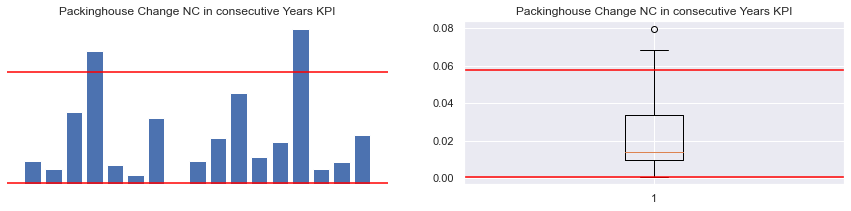

In [171]:
pkh12_2 = packinghouse_12

f, (ax1, ax2) = plt.subplots(1,2, sharey=False, figsize= (15,3))
ax1.bar(pkh12_2.Auditor,pkh12_2.ChangeInAyear)
ax1.set_title('Packinghouse Change NC in consecutive Years KPI')
ax1.axhline(y=UpperThreshold_pkh12, xmin=0, color = 'red')
ax1.axhline(y=LowerThreshold_pkh12, xmin=0, color = 'red')
ax1.axis('off')
ax2.boxplot(packinghouse_12['ChangeInAyear'])
ax2.set_title('Packinghouse Change NC in consecutive Years KPI')
ax2.axhline(y=UpperThreshold_pkh12, xmin=0, color = 'red')
ax2.axhline(y=LowerThreshold_pkh12, xmin=0, color = 'red')

plt.show()

In [172]:
if 'Auditor' in packinghouse_12:
    packinghouse_12.set_index('Auditor',inplace = True)
packinghouse_12['Auditor'] = packinghouse_12.index
packinghouse_12 = packinghouse_12.rename(columns={'PercentageNC_1':'PercentajeNC_2021','PercentageNC_2':'PercentageNC_2020'})
mark_pkh12 = packinghouse_12[(packinghouse_12.HighVariationNCinAYear == 1) | (packinghouse_12.LowVariationNCinAYear) == 1] == True
#mark_pkh12[['HighVariationNCinAYear','LowVariationNCinAYear']]

In [173]:
packinghouse_12 = packinghouse_12[['Auditor','ChangeInAyear','UpperThreshold','HighVariationNCinAYear','LowerThreshold','LowVariationNCinAYear']]
#packinghouse_12

## Packaging

In [174]:
packaging_2 = df_2[df_2['AuditTemplate'].str.contains("Packaging", case=False)]
packaging_2 = packaging_2[['Auditor','PercentageNC']]
packaging_2 = packaging_2.groupby('Auditor').mean()
packaging_1 = packaging[['Auditor','PercentageNC']]
packaging_1 = packaging_1.reset_index(drop=True)
packaging_12 = pd.merge(packaging_1, packaging_2, on='Auditor', suffixes=('_1', '_2'))
packaging_12['ChangeInAyear'] = np.absolute(packaging_12['PercentageNC_1'] - packaging_12['PercentageNC_2'])
#packaging_12.head()

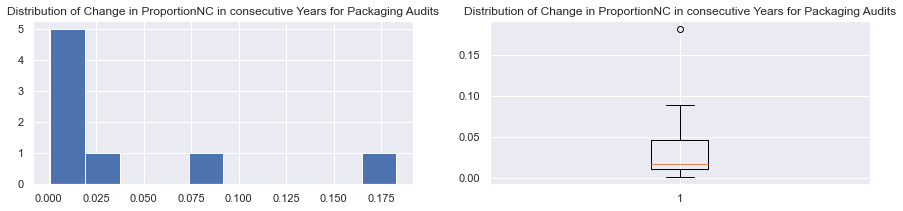

In [175]:
f, (ax1, ax2) = plt.subplots(1,2, sharey=False, figsize= (15,3))
ax1.hist(packaging_12['ChangeInAyear'])
ax1.set_title('Distribution of Change in ProportionNC in consecutive Years for Packaging Audits')
ax2.boxplot(packaging_12['ChangeInAyear'])
ax2.set_title('Distribution of Change in ProportionNC in consecutive Years for Packaging Audits')

plt.show()

### Calculating KPI

In [176]:
mean_packaging = np.mean(packaging_12.ChangeInAyear)
q1_pk12 = np.percentile(packaging_12.ChangeInAyear, 25)
q2_pk12 = np.percentile(packaging_12.ChangeInAyear, 50)
q3_pk12 = np.percentile(packaging_12.ChangeInAyear, 75)

IQR_pk12 = q3_pk12 - q1_pk12

UpperThreshold_pk12 = q3_pk12 + HighChangeinAYearNC_restriction * IQR_pk12
LowerThreshold_pk12 = q1_pk12 - LowChangeinAYearNC_restriction * IQR_pk12
if LowerThreshold_pk12 < 0:
    LowerThreshold_pk12 = packaging_12['ChangeInAyear'].min()
else:
    LowerThreshold_pk12 = LowerThreshold_pk12

In [177]:
pk12_analyzed = packaging_12
pk12_analyzed['UpperThreshold'] = UpperThreshold_pk12
pk12_analyzed['HighVariationNCinAYear'] = ''
pk12_analyzed.loc[pk12_analyzed['ChangeInAyear'] > pk12_analyzed['UpperThreshold'], 'HighVariationNCinAYear'] = 1
pk12_analyzed.loc[pk12_analyzed['ChangeInAyear'] <= pk12_analyzed['UpperThreshold'], 'HighVariationNCinAYear'] = 0

In [178]:
pk12_analyzed['LowVariationNCinAYear'] = ''
pk12_analyzed['LowerThreshold'] = LowerThreshold_pk12
pk12_analyzed.loc[pk12_analyzed['ChangeInAyear'] < pk12_analyzed['LowerThreshold'], 'LowVariationNCinAYear'] = 1
pk12_analyzed.loc[pk12_analyzed['ChangeInAyear'] >= pk12_analyzed['LowerThreshold'], 'LowVariationNCinAYear'] = 0

In [179]:
low_pk12 = pk12_analyzed[['Auditor','LowVariationNCinAYear']]
high_pk12 = pk12_analyzed[['Auditor','HighVariationNCinAYear']]
pk12_analyzed = pd.merge(low_pk12, high_pk12, on='Auditor', suffixes=('_1', '_2'))
#pk12_analyzed.head()

### Visualization of KPI

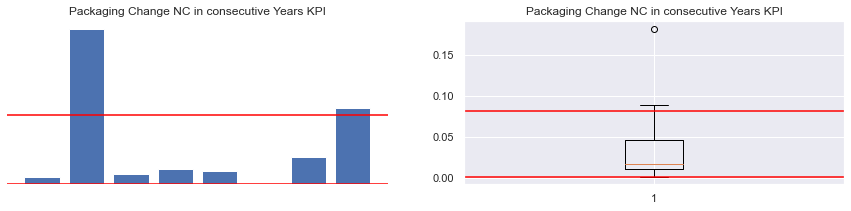

In [180]:
pk12_2 = packaging_12

f, (ax1, ax2) = plt.subplots(1,2, sharey=False, figsize= (15,3))
ax1.bar(pk12_2.Auditor,pk12_2.ChangeInAyear)
ax1.set_title('Packaging Change NC in consecutive Years KPI')
ax1.axhline(y=UpperThreshold_pk12, xmin=0, color = 'red')
ax1.axhline(y=LowerThreshold_pk12, xmin=0, color = 'red')
ax1.axis('off')
ax2.boxplot(packaging_12['ChangeInAyear'])
ax2.set_title('Packaging Change NC in consecutive Years KPI')
ax2.axhline(y=UpperThreshold_pk12, xmin=0, color = 'red')
ax2.axhline(y=LowerThreshold_pk12, xmin=0, color = 'red')

plt.show()

In [181]:
if 'Auditor' in packaging_12:
    packaging_12.set_index('Auditor',inplace = True)
packaging_12['Auditor'] = packaging_12.index
packaging_12 = packaging_12.rename(columns={'PercentageNC_1':'PercentajeNC_2021','PercentageNC_2':'PercentageNC_2020'})
mark_pk12 = packaging_12[(packaging_12.HighVariationNCinAYear == 1) | (packaging_12.LowVariationNCinAYear) == 1] == True
mark_pk12[['HighVariationNCinAYear','LowVariationNCinAYear']]

,HighVariationNCinAYear,LowVariationNCinAYear
Auditor,,
Jill Skrupa,True,False
Yahaira Nunez,True,False


In [182]:
packaging_12 = packaging_12[['Auditor','ChangeInAyear','UpperThreshold','HighVariationNCinAYear','LowerThreshold','LowVariationNCinAYear']]
#packaging_12

## Storage & Distribution Center

In [183]:
storage_2 = df_2[df_2['AuditTemplate'].str.contains("Storage & Distribution Center", case=False)]
storage_2 = storage_2[['Auditor','PercentageNC']]
storage_2 = storage_2.groupby('Auditor').mean()
storage_1 = storage[['Auditor','PercentageNC']]
storage_1 = storage_1.reset_index(drop=True)
storage_12 = pd.merge(storage_1, storage_2, on='Auditor', suffixes=('_1', '_2'))
storage_12['ChangeInAyear'] = np.absolute(storage_12['PercentageNC_1'] - storage_12['PercentageNC_2'])
#storage_12.head()

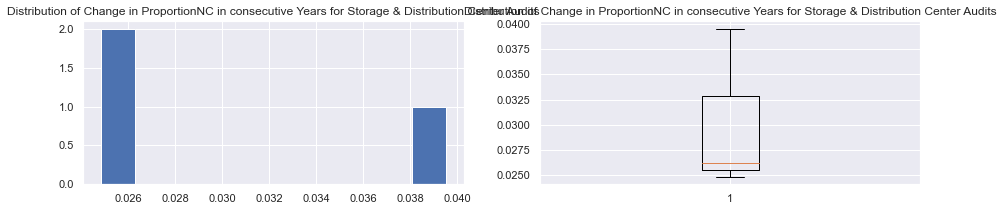

In [184]:
f, (ax1, ax2) = plt.subplots(1,2, sharey=False, figsize= (15,3))
ax1.hist(storage_12['ChangeInAyear'])
ax1.set_title('Distribution of Change in ProportionNC in consecutive Years for Storage & Distribution Center Audits')
ax2.boxplot(storage_12['ChangeInAyear'])
ax2.set_title('Distribution of Change in ProportionNC in consecutive Years for Storage & Distribution Center Audits')

plt.show()

### Calculating KPI

In [185]:
mean_storage = np.mean(storage_12.ChangeInAyear)
q1_sd12 = np.percentile(storage_12.ChangeInAyear, 25)
q2_sd12 = np.percentile(storage_12.ChangeInAyear, 50)
q3_sd12 = np.percentile(storage_12.ChangeInAyear, 75)

IQR_sd12 = q3_sd12 - q1_sd12

UpperThreshold_sd12 = q3_sd12 + HighChangeinAYearNC_restriction * IQR_sd12
LowerThreshold_sd12 = q1_sd12 - LowChangeinAYearNC_restriction * IQR_sd12
if LowerThreshold_sd12 < 0:
    LowerThreshold_sd12 = storage_12['ChangeInAyear'].min()
else:
    LowerThreshold_sd12 = LowerThreshold_sd12

In [186]:
sd12_analyzed = storage_12
sd12_analyzed['UpperThreshold'] = UpperThreshold_sd12
sd12_analyzed['HighVariationNCinAYear'] = ''
sd12_analyzed.loc[sd12_analyzed['ChangeInAyear'] > sd12_analyzed['UpperThreshold'], 'HighVariationNCinAYear'] = 1
sd12_analyzed.loc[sd12_analyzed['ChangeInAyear'] <= sd12_analyzed['UpperThreshold'], 'HighVariationNCinAYear'] = 0

In [187]:
sd12_analyzed['LowVariationNCinAYear'] = ''
sd12_analyzed['LowerThreshold'] = LowerThreshold_sd12
sd12_analyzed.loc[sd12_analyzed['ChangeInAyear'] < sd12_analyzed['LowerThreshold'], 'LowVariationNCinAYear'] = 1
sd12_analyzed.loc[sd12_analyzed['ChangeInAyear'] >= sd12_analyzed['LowerThreshold'], 'LowVariationNCinAYear'] = 0

In [188]:
low_sd12 = sd12_analyzed[['Auditor','LowVariationNCinAYear']]
high_sd12 = sd12_analyzed[['Auditor','HighVariationNCinAYear']]
sd12_analyzed = pd.merge(low_sd12, high_sd12, on='Auditor', suffixes=('_1', '_2'))
#sd12_analyzed.head()

### Visualization of KPI 

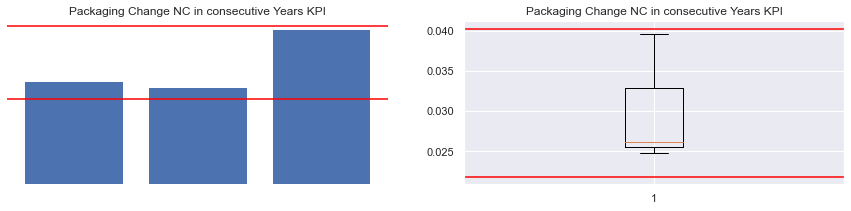

In [189]:
sd12_2 = storage_12

f, (ax1, ax2) = plt.subplots(1,2, sharey=False, figsize= (15,3))
ax1.bar(sd12_2.Auditor,sd12_2.ChangeInAyear)
ax1.set_title('Packaging Change NC in consecutive Years KPI')
ax1.axhline(y=UpperThreshold_sd12, xmin=0, color = 'red')
ax1.axhline(y=LowerThreshold_sd12, xmin=0, color = 'red')
ax1.axis('off')
ax2.boxplot(storage_12['ChangeInAyear'])
ax2.set_title('Packaging Change NC in consecutive Years KPI')
ax2.axhline(y=UpperThreshold_sd12, xmin=0, color = 'red')
ax2.axhline(y=LowerThreshold_sd12, xmin=0, color = 'red')

plt.show()

In [190]:
storage_12 = storage_12[['Auditor','ChangeInAyear','UpperThreshold','HighVariationNCinAYear','LowerThreshold','LowVariationNCinAYear']]
#storage_12

# Results

In [191]:
def text_format(val):
    color = 'salmon' if val == 1 else 'white'
    return 'background-color: %s' % color

In [192]:
pd.options.mode.chained_assignment = None  # default='warn'
auditor_CB = df[['Auditor','CBID','TpaFirmName']]
auditor_CB['id'] = auditor_CB['Auditor'] + '|' + auditor_CB['TpaFirmName']
auditor_CB = pd.DataFrame(auditor_CB['id'].unique())
auditor_CB = auditor_CB[0].str.split("|", n = 1, expand = True)
auditor_CB = auditor_CB.rename(columns={0:'Auditor',1:'CbName'})

## Proportion NC KPI

In [193]:
greenhouse['AuditType'] = 'Greenhouse'
ranch['AuditType'] = 'Ranch'
cold['AuditType'] = 'Cooling and Cold Storage'
harvc['AuditType'] = 'Harvest Crew'
packinghouse['AuditType'] = 'Packinghouse'
packaging['AuditType'] = 'Greenhouse'
storage['AuditType'] = 'Storage & Distribution Center'
ProportionKPI = pd.concat([ranch,packaging], axis = 0)
ProportionKPI = pd.concat([ProportionKPI,storage], axis = 0)
ProportionKPI = pd.concat([ProportionKPI,greenhouse], axis = 0)
ProportionKPI = pd.concat([ProportionKPI,cold], axis = 0)
ProportionKPI = pd.concat([ProportionKPI,harvc], axis = 0)
ProportionKPI = pd.concat([ProportionKPI,packinghouse], axis = 0)
ProportionKPI = ProportionKPI.rename(columns={'PercentageNC':'ProportionNC'})
ProportionKPI = ProportionKPI[['Auditor','AuditType','ProportionNC','UpperThreshold','HighProportionNC','LowerThreshold','LowProportionNC']]
ProportionKPI = ProportionKPI.reset_index(drop=True)

ProportionKPI_CB = pd.merge(ProportionKPI, auditor_CB, on='Auditor', suffixes=('_1', '_2'))
ProportionKPI_CB = ProportionKPI_CB[ProportionKPI_CB['CbName'] == CBName]


ProportionKPI_CB.style.applymap(text_format)

,Auditor,AuditType,ProportionNC,UpperThreshold,HighProportionNC,LowerThreshold,LowProportionNC,CbName
0,Andy Alonzo,Ranch,0.048494,0.118372,0,0.044664,0,Primus Auditing Ops (PAO)
2,Aubrey Buchanan,Ranch,0.170000,0.118372,1,0.044664,0,Primus Auditing Ops (PAO)
3,Aubrey Buchanan,Packinghouse,0.058217,0.168998,0,0.026533,0,Primus Auditing Ops (PAO)
4,Breana Lopez,Ranch,0.061728,0.118372,0,0.044664,0,Primus Auditing Ops (PAO)
5,Breana Lopez,Harvest Crew,0.040127,0.092372,0,0.032555,0,Primus Auditing Ops (PAO)
6,Bruce Wilkins,Ranch,0.064516,0.118372,0,0.044664,0,Primus Auditing Ops (PAO)
7,Bruce Wilkins,Greenhouse,0.122741,0.128628,0,0.122741,0,Primus Auditing Ops (PAO)
8,Bruce Wilkins,Harvest Crew,0.078975,0.092372,0,0.032555,0,Primus Auditing Ops (PAO)
9,Bruce Wilkins,Packinghouse,0.083903,0.168998,0,0.026533,0,Primus Auditing Ops (PAO)
10,Carlos Arjona,Ranch,0.067416,0.118372,0,0.044664,0,Primus Auditing Ops (PAO)


## Variation Non Conformances KPI

In [194]:
ranchSTD['AuditType'] = 'Ranch'
packagingSTD['AuditType'] = 'Packaging'
storageSTD['AuditType'] = 'Storage & Distribution Center'
greenhouseSTD['AuditType'] = 'Greenhouse'
coldSTD['AuditType'] = 'Cooling and Cold Storage'
harvestSTD['AuditType'] = 'Harvest Crew'
packinghouseSTD['AuditType'] = 'Packinghouse'
VariationKPI = pd.concat([ranchSTD,packagingSTD], axis = 0)
VariationKPI = pd.concat([VariationKPI,storageSTD], axis = 0)
VariationKPI = pd.concat([VariationKPI,greenhouseSTD], axis = 0)
VariationKPI = pd.concat([VariationKPI,coldSTD], axis = 0)
VariationKPI = pd.concat([VariationKPI,harvestSTD], axis = 0)
VariationKPI = pd.concat([VariationKPI,packinghouseSTD], axis = 0)
VariationKPI = VariationKPI.rename(columns={'StdNC':'VariationNC'})
VariationKPI = VariationKPI[['Auditor','AuditType','VariationNC','UpperThreshold','HighVariationNC','LowerThreshold','LowVariationNC']]
VariationKPI = VariationKPI.reset_index(drop=True)




VariationKPI_CB = pd.merge(ProportionKPI, auditor_CB, on='Auditor', suffixes=('_1', '_2'))
VariationKPI_CB = VariationKPI_CB[VariationKPI_CB['CbName'] == CBName]


VariationKPI_CB.style.applymap(text_format)

,Auditor,AuditType,ProportionNC,UpperThreshold,HighProportionNC,LowerThreshold,LowProportionNC,CbName
0,Andy Alonzo,Ranch,0.048494,0.118372,0,0.044664,0,Primus Auditing Ops (PAO)
2,Aubrey Buchanan,Ranch,0.170000,0.118372,1,0.044664,0,Primus Auditing Ops (PAO)
3,Aubrey Buchanan,Packinghouse,0.058217,0.168998,0,0.026533,0,Primus Auditing Ops (PAO)
4,Breana Lopez,Ranch,0.061728,0.118372,0,0.044664,0,Primus Auditing Ops (PAO)
5,Breana Lopez,Harvest Crew,0.040127,0.092372,0,0.032555,0,Primus Auditing Ops (PAO)
6,Bruce Wilkins,Ranch,0.064516,0.118372,0,0.044664,0,Primus Auditing Ops (PAO)
7,Bruce Wilkins,Greenhouse,0.122741,0.128628,0,0.122741,0,Primus Auditing Ops (PAO)
8,Bruce Wilkins,Harvest Crew,0.078975,0.092372,0,0.032555,0,Primus Auditing Ops (PAO)
9,Bruce Wilkins,Packinghouse,0.083903,0.168998,0,0.026533,0,Primus Auditing Ops (PAO)
10,Carlos Arjona,Ranch,0.067416,0.118372,0,0.044664,0,Primus Auditing Ops (PAO)


## Change proportion NC in a Year KPI

In [195]:
pd.options.mode.chained_assignment = None  # default='warn'
ranch_12['AuditType'] = 'Ranch'
packaging_12['AuditType'] = 'Packaging'
storage_12['AuditType'] = 'Storage & Distribution Center'
greenhouse_12['AuditType'] = 'Greenhouse'
cold_12['AuditType'] = 'Cooling and Cold Storage'
harv_12['AuditType'] = 'Harvest Crew'
packinghouse_12['AuditType'] = 'Packinghouse'
ChangeinAYearKPI = pd.concat([ranch_12,packaging], axis = 0)
ChangeinAYearKPI = pd.concat([ChangeinAYearKPI,storage_12], axis = 0)
ChangeinAYearKPI = pd.concat([ChangeinAYearKPI,greenhouse_12], axis = 0)
ChangeinAYearKPI = pd.concat([ChangeinAYearKPI,cold_12], axis = 0)
ChangeinAYearKPI = pd.concat([ChangeinAYearKPI,harv_12], axis = 0)
ChangeinAYearKPI = pd.concat([ChangeinAYearKPI,packinghouse_12], axis = 0)
ChangeinAYearKPI = ChangeinAYearKPI.rename(columns={'PercentageNC':'ProportionNC'})
ChangeinAYearKPI = ChangeinAYearKPI[['Auditor','AuditType','ChangeInAyear','UpperThreshold','HighVariationNCinAYear','LowerThreshold','LowVariationNCinAYear']]
ChangeinAYearKPI = ChangeinAYearKPI.reset_index(drop=True)
ChangeinAYearKPI = ChangeinAYearKPI.dropna()


ChangeinAYearKPI_CB = pd.merge(ProportionKPI, auditor_CB, on='Auditor', suffixes=('_1', '_2'))
ChangeinAYearKPI_CB = ChangeinAYearKPI_CB[ChangeinAYearKPI_CB['CbName'] == CBName]


ChangeinAYearKPI_CB.style.applymap(text_format)

,Auditor,AuditType,ProportionNC,UpperThreshold,HighProportionNC,LowerThreshold,LowProportionNC,CbName
0,Andy Alonzo,Ranch,0.048494,0.118372,0,0.044664,0,Primus Auditing Ops (PAO)
2,Aubrey Buchanan,Ranch,0.170000,0.118372,1,0.044664,0,Primus Auditing Ops (PAO)
3,Aubrey Buchanan,Packinghouse,0.058217,0.168998,0,0.026533,0,Primus Auditing Ops (PAO)
4,Breana Lopez,Ranch,0.061728,0.118372,0,0.044664,0,Primus Auditing Ops (PAO)
5,Breana Lopez,Harvest Crew,0.040127,0.092372,0,0.032555,0,Primus Auditing Ops (PAO)
6,Bruce Wilkins,Ranch,0.064516,0.118372,0,0.044664,0,Primus Auditing Ops (PAO)
7,Bruce Wilkins,Greenhouse,0.122741,0.128628,0,0.122741,0,Primus Auditing Ops (PAO)
8,Bruce Wilkins,Harvest Crew,0.078975,0.092372,0,0.032555,0,Primus Auditing Ops (PAO)
9,Bruce Wilkins,Packinghouse,0.083903,0.168998,0,0.026533,0,Primus Auditing Ops (PAO)
10,Carlos Arjona,Ranch,0.067416,0.118372,0,0.044664,0,Primus Auditing Ops (PAO)


# Generate Excel Files

In [196]:
ProportionKPI = pd.merge(ProportionKPI, auditor_CB, on='Auditor', suffixes=('_1', '_2'))

In [197]:
ProportionKPI['FlagAuditor_ProportionNC'] = ProportionKPI['HighProportionNC'] + ProportionKPI['LowProportionNC']

In [198]:
if 'CbName_1' in ProportionKPI.columns:
    del(ProportionKPI['CbName_1'])

if 'CbName_2' in ProportionKPI.columns:
    del(ProportionKPI['CbName_2'])
    
if 'HighProportionNC' in ProportionKPI.columns:
    del(ProportionKPI['HighProportionNC'])
    
if 'LowProportionNC' in ProportionKPI.columns:
    del(ProportionKPI['LowProportionNC'])

In [199]:
if 'CbName' in ProportionKPI.columns:
    ProportionKPI.head()
else:
    ProportionKPI = pd.merge(ProportionKPI, auditor_CB, on='Auditor', suffixes=('_1', '_2'))



In [200]:
VariationKPI = pd.merge(VariationKPI, auditor_CB, on='Auditor', suffixes=('_1', '_2'))

In [201]:
if 'HighVariationNC' in ProportionKPI.columns:
    VariationKPI['FlagAuditor_VariationNC'] = VariationKPI['HighVariationNC'] + VariationKPI['LowVariationNC']

In [202]:
if 'CbName_1' in VariationKPI.columns:
    del(VariationKPI['CbName_1'])

if 'CbName_2' in VariationKPI.columns:
    del(VariationKPI['CbName_2'])
    
if 'HighVariationNC' in VariationKPI.columns:
    del(VariationKPI['HighVariationNC'])
    
if 'LowVariationNC' in VariationKPI.columns:
    del(VariationKPI['LowVariationNC'])

In [203]:
if 'CbName' in VariationKPI.columns:
    VariationKPI.head()
else:
    VariationKPI = pd.merge(VariationKPI, auditor_CB, on='Auditor', suffixes=('_1', '_2'))
    VariationKPI.head()


In [204]:
ChangeinAYearKPI = pd.merge(ChangeinAYearKPI, auditor_CB, on='Auditor', suffixes=('_1', '_2'))

In [205]:
if 'HighVariationNCinAYear' in ChangeinAYearKPI.columns:
    ChangeinAYearKPI['FlagAuditor_VariationNCinAYear'] = ChangeinAYearKPI['HighVariationNCinAYear'] + ChangeinAYearKPI['LowVariationNCinAYear']

In [206]:
if 'CbName_1' in ChangeinAYearKPI.columns:
    del(ChangeinAYearKPI['CbName_1'])

if 'CbName_2' in ChangeinAYearKPI.columns:
    del(ChangeinAYearKPI['CbName_2'])
    
if 'HighVariationNCinAYear' in ChangeinAYearKPI.columns:
    del(ChangeinAYearKPI['HighVariationNCinAYear'])
    
if 'LowVariationNCinAYear' in ChangeinAYearKPI.columns:
    del(ChangeinAYearKPI['LowVariationNCinAYear'])

In [207]:
if 'CbName' in ChangeinAYearKPI.columns:
    ChangeinAYearKPI.head()
else:
    ChangeinAYearKPI = pd.merge(ChangeinAYearKPI, auditor_CB, on='Auditor', suffixes=('_1', '_2'))
    ChangeinAYearKPI.head()

ChangeinAYearKPI = ChangeinAYearKPI[['Auditor','AuditType','ChangeInAyear','UpperThreshold','LowerThreshold','FlagAuditor_VariationNCinAYear','CbName']]

In [208]:
ProportionKPI.head()

,Auditor,AuditType,ProportionNC,UpperThreshold,LowerThreshold,CbName,FlagAuditor_ProportionNC
0,Andy Alonzo,Ranch,0.048494,0.118372,0.044664,Primus Auditing Ops (PAO),0
1,Andy Moreno,Ranch,0.048193,0.118372,0.044664,Ceres Certification International,0
2,Aubrey Buchanan,Ranch,0.170000,0.118372,0.044664,Primus Auditing Ops (PAO),1
3,Aubrey Buchanan,Packinghouse,0.058217,0.168998,0.026533,Primus Auditing Ops (PAO),0
4,Breana Lopez,Ranch,0.061728,0.118372,0.044664,Primus Auditing Ops (PAO),0


In [209]:
VariationKPI.head()

,Auditor,AuditType,VariationNC,UpperThreshold,LowerThreshold,CbName
0,Andy Alonzo,Ranch,0.021687,0.046333,0.000000,Primus Auditing Ops (PAO)
1,Aubrey Buchanan,Ranch,0.000000,0.046333,0.000000,Primus Auditing Ops (PAO)
2,Aubrey Buchanan,Packinghouse,0.025762,0.050255,0.015891,Primus Auditing Ops (PAO)
3,Cristian Nieto,Ranch,0.000000,0.046333,0.000000,Primus Auditing Ops (PAO)
4,Cristian Nieto,Harvest Crew,0.004338,0.043429,0.000000,Primus Auditing Ops (PAO)


In [210]:
ChangeinAYearKPI.head()

,Auditor,AuditType,ChangeInAyear,UpperThreshold,LowerThreshold,FlagAuditor_VariationNCinAYear,CbName
0,Andy Alonzo,Ranch,0.013361,0.039075,0.001162,0,Primus Auditing Ops (PAO)
1,Andy Moreno,Ranch,0.012032,0.039075,0.001162,0,Ceres Certification International
2,Aubrey Buchanan,Ranch,0.072068,0.039075,0.001162,1,Primus Auditing Ops (PAO)
3,Aubrey Buchanan,Packinghouse,0.007756,0.057908,0.000636,0,Primus Auditing Ops (PAO)
4,Carlos Arjona,Ranch,0.013652,0.039075,0.001162,0,Primus Auditing Ops (PAO)


## Primus Auditing Ops

In [211]:
ProportionKPI_CB = ProportionKPI[ProportionKPI['CbName'] == 'Primus Auditing Ops (PAO)']
VariationKPI_CB = VariationKPI[VariationKPI['CbName'] == 'Primus Auditing Ops (PAO)']
ChangeinAYearKPI_CB = ChangeinAYearKPI[ChangeinAYearKPI['CbName'] == 'Primus Auditing Ops (PAO)']

In [212]:
with pd.ExcelWriter('C:/Users/katyl/OneDrive/Escritorio/PrimusStandardKPI_PAO.xlsx') as writer:
    ProportionKPI_CB.to_excel(writer, sheet_name='ProportionNC_KPI')
    VariationKPI_CB.to_excel(writer, sheet_name='VariationNC_KPI')
    ChangeinAYearKPI_CB.to_excel(writer, sheet_name='ChangeInAYear_KPI')

## SCS Global Services

In [213]:
ProportionKPI_CB = ProportionKPI[ProportionKPI['CbName'] == 'SCS Global Services']
VariationKPI_CB = VariationKPI[VariationKPI['CbName'] == 'SCS Global Services']
ChangeinAYearKPI_CB = ChangeinAYearKPI[ChangeinAYearKPI['CbName'] == 'SCS Global Services']

In [214]:
with pd.ExcelWriter('C:/Users/katyl/OneDrive/Escritorio/PrimusStandardKPI_SCS.xlsx') as writer:
    ProportionKPI_CB.to_excel(writer, sheet_name='ProportionNC_KPI')
    VariationKPI_CB.to_excel(writer, sheet_name='VariationNC_KPI')
    ChangeinAYearKPI_CB.to_excel(writer, sheet_name='ChangeInAYear_KPI')

## WQS, LLC

In [215]:
ProportionKPI_CB = ProportionKPI[ProportionKPI['CbName'] == 'WQS, LLC']
VariationKPI_CB = VariationKPI[VariationKPI['CbName'] == 'WQS, LLC']
ChangeinAYearKPI_CB = ChangeinAYearKPI[ChangeinAYearKPI['CbName'] == 'WQS, LLC']

In [216]:
with pd.ExcelWriter('C:/Users/katyl/OneDrive/Escritorio/PrimusStandardKPI_WQS.xlsx') as writer:
    ProportionKPI_CB.to_excel(writer, sheet_name='ProportionNC_KPI')
    VariationKPI_CB.to_excel(writer, sheet_name='VariationNC_KPI')
    ChangeinAYearKPI_CB.to_excel(writer, sheet_name='ChangeInAYear_KPI')

## Ceres Certification International

In [217]:
ProportionKPI_CB = ProportionKPI[ProportionKPI['CbName'] == 'Ceres Certification International']
VariationKPI_CB = VariationKPI[VariationKPI['CbName'] == 'Ceres Certification International']
ChangeinAYearKPI_CB = ChangeinAYearKPI[ChangeinAYearKPI['CbName'] == 'Ceres Certification International']

In [218]:
with pd.ExcelWriter('C:/Users/katyl/OneDrive/Escritorio/PrimusStandardKPI_CERES.xlsx') as writer:
    ProportionKPI_CB.to_excel(writer, sheet_name='ProportionNC_KPI')
    VariationKPI_CB.to_excel(writer, sheet_name='VariationNC_KPI')
    ChangeinAYearKPI_CB.to_excel(writer, sheet_name='ChangeInAYear_KPI')

## Food Safety Certifiers

In [219]:
ProportionKPI_CB = ProportionKPI[ProportionKPI['CbName'] == 'Food Safety Certifiers']
VariationKPI_CB = VariationKPI[VariationKPI['CbName'] == 'Food Safety Certifiers']
ChangeinAYearKPI_CB = ChangeinAYearKPI[ChangeinAYearKPI['CbName'] == 'Food Safety Certifiers']

In [220]:
with pd.ExcelWriter('C:/Users/katyl/OneDrive/Escritorio/PrimusStandardKPI_Food_Safety.xlsx') as writer:
    ProportionKPI_CB.to_excel(writer, sheet_name='ProportionNC_KPI')
    VariationKPI_CB.to_excel(writer, sheet_name='VariationNC_KPI')
    ChangeinAYearKPI_CB.to_excel(writer, sheet_name='ChangeInAYear_KPI')

## Control Union Certification

In [221]:
ProportionKPI_CB = ProportionKPI[ProportionKPI['CbName'] == 'Control Union Certification']
VariationKPI_CB = VariationKPI[VariationKPI['CbName'] == 'Control Union Certification']
ChangeinAYearKPI_CB = ChangeinAYearKPI[ChangeinAYearKPI['CbName'] == 'Control Union Certification']

In [222]:
with pd.ExcelWriter('C:/Users/katyl/OneDrive/Escritorio/PrimusStandardKPI_Control_Union.xlsx') as writer:
    ProportionKPI_CB.to_excel(writer, sheet_name='ProportionNC_KPI')
    VariationKPI_CB.to_excel(writer, sheet_name='VariationNC_KPI')
    ChangeinAYearKPI_CB.to_excel(writer, sheet_name='ChangeInAYear_KPI')

## NSF Certification, LLC

In [223]:
ProportionKPI_CB = ProportionKPI[ProportionKPI['CbName'] == 'NSF Certification, LLC']
VariationKPI_CB = VariationKPI[VariationKPI['CbName'] == 'NSF Certification, LLC']
ChangeinAYearKPI_CB = ChangeinAYearKPI[ChangeinAYearKPI['CbName'] == 'NSF Certification, LLC']

In [224]:
with pd.ExcelWriter('C:/Users/katyl/OneDrive/Escritorio/PrimusStandardKPI_NSF.xlsx') as writer:
    ProportionKPI_CB.to_excel(writer, sheet_name='ProportionNC_KPI')
    VariationKPI_CB.to_excel(writer, sheet_name='VariationNC_KPI')
    ChangeinAYearKPI_CB.to_excel(writer, sheet_name='ChangeInAYear_KPI')

## Professional Food Safety

In [225]:
ProportionKPI_CB = ProportionKPI[ProportionKPI['CbName'] == 'Professional Food Safety']
VariationKPI_CB = VariationKPI[VariationKPI['CbName'] == 'Professional Food Safety']
ChangeinAYearKPI_CB = ChangeinAYearKPI[ChangeinAYearKPI['CbName'] == 'Professional Food Safety']

In [226]:
with pd.ExcelWriter('C:/Users/katyl/OneDrive/Escritorio/PrimusStandardKPI_Professional_Food_Safety.xlsx') as writer:
    ProportionKPI_CB.to_excel(writer, sheet_name='ProportionNC_KPI')
    VariationKPI_CB.to_excel(writer, sheet_name='VariationNC_KPI')
    ChangeinAYearKPI_CB.to_excel(writer, sheet_name='ChangeInAYear_KPI')

In [227]:
print('Finished')

Finished
